# Introduction

<img src='https://alexnguyen9.github.io/img/aram.jpg'>

All Random All Mid, ARAM in short, is a PvP game mode in popular game, League of Legends. ARAM, as it's name says, is a game where all 10 players are given a random champion to play from a set list, including champions they own. The 10 players are split into 2 teams and are pitted against each other on a one-lane map in order to capture the other team's flag i.e. the nexus. Although champion select is random, players are given a chance to reroll for another one or trade with another player on their team given they own the champion. 

ARAM is one of League's long-standing game modes beginning in 2012 since the game's creation in 2009. However their flagship game mode is "Summoner's Rift" and not ARAM. As a result, match histories are given for ARAM matches and not many sites out in the internet show personal ARAM stats. I play ARAM much more often than Summoner's Rift and I wanted to know how I was doing in ARAM, bringing this data exploration into being. 

The ARAM data was collected via the game company's (RIOT) API. I have played since 2015 and have 3000+ total ARAM games the last time I checked in the game client. The API only shows up to around 1735 games when searching for all games. I checked by playing another game and the latest game from before wasn't there anymore. 

## Import Statements

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from datetime import datetime

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
register_matplotlib_converters()

## Load the Data

In [3]:
data = pd.read_csv('aram-data1.csv')
data_champion_id = pd.read_csv('league_champion_key.csv')
data_roles = pd.read_csv('league_champions.csv')

# Preliminary Exploration

## Dataset #1

In [4]:
data.shape

(1733, 30)

In [5]:
data.head()

game_id  game_duration  champion    win  kills  deaths  assists  \
0  4019795072           1624        34  False     11      10       36   
1  4019839759           1146         9  False      5      11       15   
2  4019747769            898       429  False      9      10       12   
3  4017505740           1242        91  False      6      12       12   
4  4017502712           1075        85  False      6      10       19   

   largestKillingSpree  largestMultiKill  killingSprees  ...  \
0                    3                 1              3  ...   
1                    0                 1              0  ...   
2                    3                 2              2  ...   
3                    2                 2              2  ...   
4                    2                 2              2  ...   

   magicDamageDealtToChampions  physicalDamageDealtToChampions  \
0                        39615                             917   
1                        16478                             136   
2                          990                           18188   
3                            0                           36015   
4                        22981                            2424   

   trueDamageDealtToChampions  totalHeal  damageSelfMitigated  \
0                         945       5657                25494   
1                         240       4595                11556   
2                         346       3690                12990   
3                        1605       6329                29932   
4                         341       2529                11278   

   timeCCingOthers  totalDamageTaken  goldEarned  goldSpent  \
0               85             34833       17967      16200   
1               34             26536       12437      11150   
2               11             21634       10646      10150   
3               12             36237       12747      11550   
4               25             20590       11266      10050   

   totalTimeCrowdControlDealt  
0                         917  
1                         300  
2                         101  
3                         306  
4                          45  

[5 rows x 30 columns]

In [6]:
data.info()
# no NaN values observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   game_id                         1733 non-null   int64
 1   game_duration                   1733 non-null   int64
 2   champion                        1733 non-null   int64
 3   win                             1733 non-null   bool 
 4   kills                           1733 non-null   int64
 5   deaths                          1733 non-null   int64
 6   assists                         1733 non-null   int64
 7   largestKillingSpree             1733 non-null   int64
 8   largestMultiKill                1733 non-null   int64
 9   killingSprees                   1733 non-null   int64
 10  longestTimeSpentLiving          1733 non-null   int64
 11  doubleKills                     1733 non-null   int64
 12  tripleKills                     1733 non-null   int64
 13  qua

In [7]:
# checking for duplicate data
print(f'Duplicated data: {data.duplicated().values.any()}')

Duplicated data: False


## Dataset #2

In [8]:
data_champion_id.shape

(156, 2)

In [9]:
data_champion_id.head(10)

champion      name
0       266    Aatrox
1       103      Ahri
2        84     Akali
3       166    Akshan
4        12   Alistar
5        32     Amumu
6        34    Anivia
7         1     Annie
8       523  Aphelios
9        22      Ashe

In [10]:
data_champion_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   champion  156 non-null    int64 
 1   name      156 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


## Dataset #3

In [11]:
data_roles.shape

(156, 2)

In [12]:
data_roles.head()

champion      role
0   Aatrox   Fighter
1     Ahri      Mage
2    Akali  Assassin
3   Akshan  Marksman
4  Alistar      Tank

In [13]:
data_roles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   champion  156 non-null    object
 1   role      156 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


# Cleaning Dataset

In [14]:
# changing champion id in dataset #1 to respective champion name
list_name = []
for champ_id in data.champion:
    idx = data_champion_id.index[data_champion_id.champion == champ_id]
    location = data_champion_id.loc[idx]
    list_name.append(location.name.item())
list_name
data.champion = list_name

In [15]:
# Adding Column for champions roles
data = data.merge(data_roles, on='champion')

In [16]:
data.sample(5)

game_id  game_duration champion    win  kills  deaths  assists  \
843   3983634153           1033     Jinx  False      7       9       17   
214   3324828829            700     Azir   True      6       5       15   
748   3303269787            903    Kayle   True      8       8       18   
1392  3142847555            932   Lucian   True     14       4       20   
1693  3660754268           1321   Samira  False     11      12       22   

      largestKillingSpree  largestMultiKill  killingSprees  ...  \
843                     3                 2              1  ...   
214                     2                 1              2  ...   
748                     3                 2              1  ...   
1392                    4                 2              5  ...   
1693                    2                 2              1  ...   

      physicalDamageDealtToChampions  trueDamageDealtToChampions  totalHeal  \
843                            26948                        3240       3906   
214                             1132                         538       2034   
748                             5871                         686       5461   
1392                           25912                         588       2453   
1693                           23283                        1039       4904   

      damageSelfMitigated  timeCCingOthers  totalDamageTaken  goldEarned  \
843                  7129               23             19616       12795   
214                  4445               11             10933        8304   
748                  7333                7             16542       10465   
1392                 5421                1             14401       11977   
1693                23877                5             34583       15298   

      goldSpent  totalTimeCrowdControlDealt      role  
843       12050                          58  Marksman  
214        6850                          68      Mage  
748        9085                          79   Fighter  
1392       9525                          36  Marksman  
1693      14700                          49  Marksman  

[5 rows x 31 columns]

# Win Rate

First and foremost, I wanted to look at my overall win rate from the dataset.

In [17]:
win_rate = data.win.value_counts()

# plotly kept giving a future warning so changed to a dataframe.
win_rate = pd.DataFrame(win_rate)
win_rate.reset_index(inplace=True)
win_rate.columns = ['result', 'count']
win_rate

result  count
0    True    884
1   False    849

In [18]:
win_rate_fig = px.pie(win_rate,
                      labels='results',
                      values='count',
                      names={'True': 'Victory',
                             'False': 'Defeat'},
                      hole=0.5,
                      color=['Victory', 'Defeat'],
                      color_discrete_map={'Victory': '#19D3F3',
                                          'Defeat': 'Crimson'},
                      title='ARAM Win Rate')
win_rate_fig.update_traces(textposition='outside', textinfo='percent+label')
win_rate_fig.show()

Unsurprisingly, my personal win rate is 51% which is very close to 50%. Inititally I thought because the game mode was psuedo-random, the results should still be around 50/50 and it looks to be true.

There are cases where I get a champion I am favorable towards and can do well on, however there is also the chance that my team does not. The same can be said vice versa. Because of variability in people's ability to play a champ well in this game mode, games can be back and forth resulting in a 50/50 win rate. 

There is also the team composition factor. As a result of the random selection, a team composition can lean heavily towards Magic Damage, long range Poke, Skirmishes, or Sustain. Team composition is very hard to find a proper overall balance in this game mode without sacrificing one or another champion based on the team's playability on the champion. Because of these differences in team composition, sometimes it can be just a rock-paper-scissors match and we are just plainly unfavorable in the match-up.

All in all, its understandable that win-rate is around 50/50 because of some many random factors at play in the game mode. But that is what makes me keep playing this game mode especially with friends, because of the amount of crazy things we can do. Though I admit, there is a slight addiction to it, trying to extend a win streak or breaking a losing streak.

# Match Statistics

Next, I wanted to know the game time of ARAM matches I play. The game mode advertises a quick game, around 20 minutes a match because it is one-lane. But often times, I find myself playing 25 minutes games, and sometimes 30 minute games.

In [19]:
avg_game_time = data.game_duration.mean()
time_min = avg_game_time // 60
time_sec = avg_game_time % 60

print(f'Average ARAM game time: {time_min} minutes {time_sec:.2} seconds')

Average ARAM game time: 19.0 minutes 8.6 seconds


And it indeed is around 20 minutes on average as it is advertised. 

Below, the game_duration was converted to minutes instead of seconds for easier interpretation.

game_duration
count       1,733.00
mean           19.14
std             4.46
min             7.17
25%            15.92
50%            18.87
75%            22.02
max            42.30

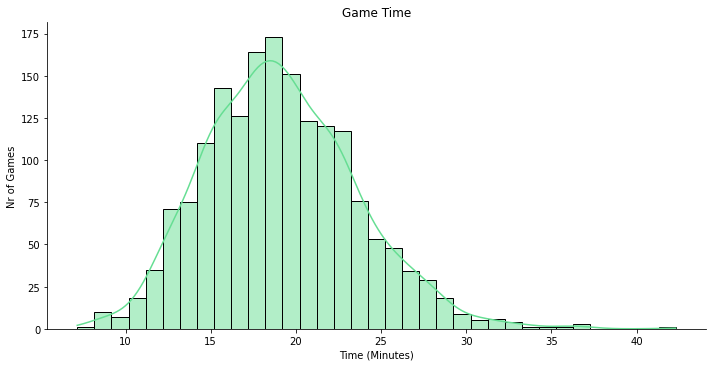

In [20]:
time_data = data['game_duration'] / 60
time_data = pd.DataFrame(time_data)
time_data

display(time_data.describe())

sns.displot(time_data.game_duration,
           aspect=2,
           kde=True,
           color='#66DE93',
           bins=35)
plt.title(f'Game Time')
plt.xlabel('Time (Minutes)')
plt.ylabel('Nr of Games')
plt.show()

The histogram also shows a relatively normal curve around 18-19 minutes being the most occurences. The majority of games last between 15 and 24 minutes. And as expected, there is a slight skew right because of the longer games.

Onwards, I wanted to look at my overall kills, deaths, and assists in ARAM, so I took the mean value for those three variables. It is shown below:

In [21]:
avg_kills = data.kills.mean()
avg_deaths = data.deaths.mean()
avg_assists = data.assists.mean()

print(f'Average kills per game: {avg_kills:.3}')
print(f'Average deaths per game: {avg_deaths:.3}')
print(f'Average assists per game: {avg_assists:.3}')

Average kills per game: 10.5
Average deaths per game: 8.78
Average assists per game: 19.9


In [22]:
data['KDA'] = (data.kills + data.assists) / data.deaths

print('KDA is abbrev. for Kills Death Assist and it is the determined by Kills+Assist / Death')
avg_kda = data.KDA.mean()
print(f'Career Average KDA: {avg_kda:.3}')

KDA is abbrev. for Kills Death Assist and it is the determined by Kills+Assist / Death
Career Average KDA: 3.92


# Champion Statistics

<img src='https://cdn.europosters.eu/image/1300/posters/league-of-legends-champions-i102252.jpg'>

ARAM being the random game it is, I was able to play a variety of champions League has to offer. In this section, I look at the different champions I play.

In [23]:
print(f'I played {data.champion.nunique()} different champions in ARAM of the current total 156')

I played 130 different champions in ARAM of the current total 156


Having played 130 different champions, I wanted to look at my top 20 picks. It could also be said instead what my 20 favorite champions to play are.

In [24]:
champion_occurence = data.champion.value_counts().sort_values(ascending=True)
top15_picks = champion_occurence.tail(20)

In [25]:
champion_bar = px.bar(top15_picks,
                     x=top15_picks.values,
                     y=top15_picks.index,
                     orientation='h',
                     color=top15_picks.values,
                     color_continuous_scale='Tealgrn',
                     title='Top 20 Champion Picks')
champion_bar.update_layout(coloraxis_showscale=False,
                          xaxis_title='Count',
                          yaxis_title='Champion')
champion_bar.show()

In [26]:
# converting champion_occurence from series to dataframe and renaming columns
champion_occurence = pd.DataFrame(champion_occurence)
champion_occurence.reset_index(inplace=True)
champion_occurence.columns = ['champion', 'total_games']

# finding the most played champ and the nr. of games with them
total_picks = champion_occurence.total_games.sum()
most_played_champ = champion_occurence.iloc[[-1]]
mpc_name = most_played_champ.champion.item()
mpc_total_played = int(most_played_champ.total_games.item())

print(f'The most picked champion was {mpc_name} at {mpc_total_played/total_picks*100:.3}%')

The most picked champion was Leblanc at 3.81%


In [27]:
roles = champion_occurence.merge(data_roles, on='champion')
roles_distribution = roles.groupby('role', as_index=False).agg({'total_games': pd.Series.sum})

roles_pie = px.pie(roles_distribution,
                  labels='role',
                  values='total_games',
                  names='role',
                  hole=0.6,
                  title='Champion Roles Played')
roles_pie.update_traces(textposition='outside', textinfo='percent+label')
roles_pie.show()

I am not surprised that marksman were my most picked role because I actually main Marksmans. Marksman are thus my comfort picks. Mages are my secondary picks. I am comfortable to play most but not all mages which shows on the chart. Looking at it another way, I am able to play a role I am comfortable on 69% of the time. Suppport and Tank are played at a very much lower rate at 4.15% and 2.71%, respectively. 

The champions chosen are all random in ARAM but according to the pie chart, there is a discrepancy in the roles played. Remember although ARAM is random, there is an option to reroll for another champion and you can trade with another player on the team. And if you look at the top 20 picks figure, not every champion is picked equally. 

The question goes back to why the 50/50 win rate if I am playing on champions I am comfortable on. It is a team game, and even though I get a champion I like, my team may not. The enemy team composition can be very challenging to play against as well. It is a team game after all.

## Champion Win Rate

The next logical step would to look at the champion win rates.

In [28]:
# creating a dataframe showing champion and their game result
champ_game_results = data.groupby(['champion', 'win'], as_index=False).agg({'game_id': pd.Series.count})
champ_game_results.rename(columns={'game_id': 'nr_games'}, inplace=True)

In [29]:
# merging champ_game_results with champion_occurence on champion to calculate their win rate
champion_data = champ_game_results.merge(champion_occurence, on='champion')
champion_data['winrate'] = champion_data.nr_games / champion_data.total_games * 100

# making sure champs with one game and defeated come out with a 0% winrate
for x in range(0, len(champion_data)):
    if champion_data.win[x] == False:
        if champion_data.nr_games[x] == champion_data.total_games[x]:
            champion_data.loc[x, 'winrate'] = 0
            
champion_data_copy = champion_data.copy()

In [30]:
# remove defeats from champions that already have 'victory' win-rate
for x in range(0, len(champion_data)):
    try:
        if champion_data.champion[x+1] == champion_data.champion[x]:
            champion_data.drop(x, axis=0, inplace=True)
    except KeyError:
        break
        
# reset index
champion_data.reset_index(inplace=True)
champion_data.drop(['index'], axis=1, inplace=True)

In [31]:
champion_data

champion    win  nr_games  total_games  winrate
0     Aatrox  False         1            1     0.00
1       Ahri   True        10           18    55.56
2      Akali   True        12           26    46.15
3    Alistar  False         1            1     0.00
4      Amumu   True         4            6    66.67
..       ...    ...       ...          ...      ...
125      Zed   True         1            4    25.00
126    Ziggs   True         8           15    53.33
127   Zilean   True         5           12    41.67
128      Zoe   True         2            7    28.57
129     Zyra   True         3            5    60.00

[130 rows x 5 columns]

### 100% Win Rate Champions

For some reason, the thought that I might have a 100% win rate champion never occurred to me. Possibly because I play mostly champions I am comfortable on as seen in the earlier bar graph and pie chart. 

In [32]:
only_win = champion_data.loc[champion_data.winrate == 100.00]
only_win = only_win.merge(data_roles, on='champion')
only_win

champion   win  nr_games  total_games  winrate     role
0    Garen  True         1            1   100.00  Fighter
1    Leona  True         2            2   100.00     Tank
2     Olaf  True         1            1   100.00  Fighter
3   Rammus  True         1            1   100.00     Tank
4  Rek'Sai  True         2            2   100.00  Fighter
5     Rell  True         1            1   100.00     Tank
6    Riven  True         1            1   100.00  Fighter
7  Warwick  True         1            1   100.00  Fighter

And to my surprise and not surprise, the champions I have a 100% win rate are on champions I play 1 or 2 times. Additionally, they're all Fighters(5) and Tanks(3), roles I have 11.1% and 2.71% play rate on, respectively.

### 0% Win Rate Champions

In [33]:
only_lose = champion_data.loc[champion_data.winrate == 0.00]
only_lose = only_lose.merge(data_roles, on='champion')
only_lose

champion    win  nr_games  total_games  winrate      role
0           Aatrox  False         1            1     0.00   Fighter
1          Alistar  False         1            1     0.00      Tank
2          Camille  False         1            1     0.00   Fighter
3           Darius  False         1            1     0.00   Fighter
4            Elise  False         1            1     0.00      Mage
5            Fiora  False         4            4     0.00   Fighter
6        Gangplank  False         2            2     0.00   Fighter
7             Gnar  False         1            1     0.00   Fighter
8           Irelia  False         2            2     0.00   Fighter
9         Malphite  False         1            1     0.00      Tank
10        Nautilus  False         3            3     0.00      Tank
11  Nunu & Willump  False         2            2     0.00      Tank
12           Poppy  False         1            1     0.00      Tank
13        Renekton  False         1            1     0.00   Fighter
14         Sejuani  False         1            1     0.00      Tank
15       Seraphine  False         1            1     0.00      Mage
16         Shyvana  False         1            1     0.00   Fighter
17           Sylas  False         7            7     0.00      Mage
18        Volibear  False         1            1     0.00   Fighter
19            Yone  False         4            4     0.00  Assassin

In [34]:
only_lose_roles = only_lose.groupby('role', as_index=False).agg({'nr_games': pd.Series.count})

win0_roles = px.pie(labels=only_lose_roles.role,
                      values=only_lose_roles.nr_games,
                      names=only_lose_roles.role,
                      hole=0.6,
                      color=only_lose_roles.role,
                      color_discrete_map={'Mage': '#EF553B',
                                          'Marksman': '#636EFA',
                                          'Assassin': '#00CC96',
                                          'Fighter': '#AB63FA',
                                          'Support': '#FFA15A',
                                          'Tank': '#19D3F3'},
                   title='0% Win Rate Champions by Roles')
win0_roles.update_traces(textposition='outside', textinfo='percent+label')

win0_roles.show()

This stat was unsurprising to me. I know there are champions I do not know how to play well and rather not play and it shows in the chart. I have a total of 20 champions that have a 0% win rate over 1700+ games. Most have 1 game on them such as Aatrox and Volibear and there are some with a couple more games. What surprised me was that I won 0 times out of 7 games on Sylas. I was sure I won 1 game at least, but I guess not. 

Looking at the pie chart, 50% of those champions were fighters and 30% tanks, 2 of my least chosen roles.

### Most Played Champion

In [35]:
champion_data.loc[champion_data.champion == mpc_name]

champion   win  nr_games  total_games  winrate
53  Leblanc  True        29           66    43.94

## Champion Summary

The chart below separates all the champions I played by roles and shows their individual win rate and games played.

In [36]:
champion_data_copy = champion_data_copy.merge(data_roles, on='champion')
champion_data = champion_data.merge(data_roles, on='champion')

In [37]:
roles_burst = px.sunburst(champion_data,
                          path=['role', 'champion'],
                          hover_data={'winrate': True},
                          values='total_games',
                          title='Champion Roles Played',
                          height=750)
roles_burst.show()

In [38]:
role_win_rate = champion_data_copy.groupby(['role', 'win'], as_index=False).agg({'nr_games': pd.Series.sum})
role_win_rate_dict = {'role': ['Assassin', 'Fighter', 'Mage', 'Marksman', 'Support', 'Tank'],
                     'total_games': [224, 193, 503, 694, 72, 47]}
role_win_df = pd.DataFrame(data=role_win_rate_dict)

role_win_rate = role_win_rate.merge(role_win_df, on='role')
role_win_rate['percentage'] = role_win_rate.nr_games / role_win_rate.total_games * 100

for x in range(len(role_win_rate.win)):
    if role_win_rate.win[x] == True:
        role_win_rate.loc[x, 'win'] = 'Victory'
    else:
        role_win_rate.loc[x, 'win'] = 'Defeat'

In [39]:
roles_win_burst = px.sunburst(role_win_rate,
                              path=['role', 'win'],
                              values='nr_games',
                              hover_data=['percentage'],
                              title='Role Win Rate',
                              height=750)
roles_win_burst.show()

The sunburst chart above shows the overall win rate for each role. A positive win rate is shown for both Marksman and Mage with 54% and 52% respectively. i have around 50/50 chance of winning on support and fighters and tend to lose on Tanks and Assassins. 

# In-Game Stats Exploration

This section will delve into the what actually happens during each game.

In [40]:
# Changing game_duration to min
data.game_duration = data.game_duration / 60
data.rename(columns={'game_duration': 'game_duration (min)'}, inplace=True)

## Damage

Damage is what exactly what it is; how much damage you are dealing to the enemies, to objectives (turrets), and other things such as summons. Damage has 3 categories: physical, magical and true damage. For a more holistic look on the game, damage dealt to champions will be the main damage stat being looked at because it incorporates all three categories and contributes to the advancing the game.

### Damage Dealt to Champions

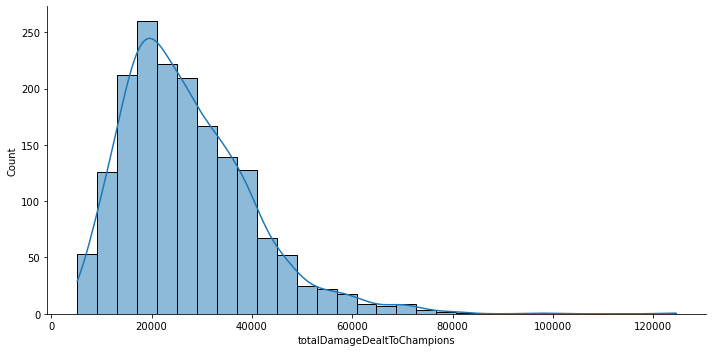

In [41]:
sns.displot(data=data.totalDamageDealtToChampions,
            aspect=2,
           bins=30,
           kde=True)
plt.show()

In [42]:
damage = data.loc[:, ('champion', 'game_duration (min)', 'totalDamageDealtToChampions', 'role')]

# damage.game_duration = damage.game_duration / 60
# damage.rename(columns={'game_duration': 'game_duration (min)'}, inplace=True)

print('Most damage done in a game:')
display(damage.sort_values('totalDamageDealtToChampions', ascending=False).head())

print('Least damage done in a game:')
display(damage.sort_values('totalDamageDealtToChampions', ascending=True).head())

Most damage done in a game:


champion  game_duration (min)  totalDamageDealtToChampions      role
882       Taliyah                31.12                       124434      Mage
781         Xayah                26.78                        97080  Marksman
83   Twisted Fate                25.98                        81244      Mage
234       Leblanc                28.95                        80555  Assassin
493      Tristana                27.28                        78305  Marksman

Least damage done in a game:


champion  game_duration (min)  totalDamageDealtToChampions      role
1653      Nautilus                15.68                         5189      Tank
1226        Soraka                16.70                         5426   Support
1616  Miss Fortune                 7.17                         5455  Marksman
1649          Bard                10.42                         5498   Support
1467         Braum                 9.13                         5510   Support

### Total Damage Dealt (incl. Structures, etc.)

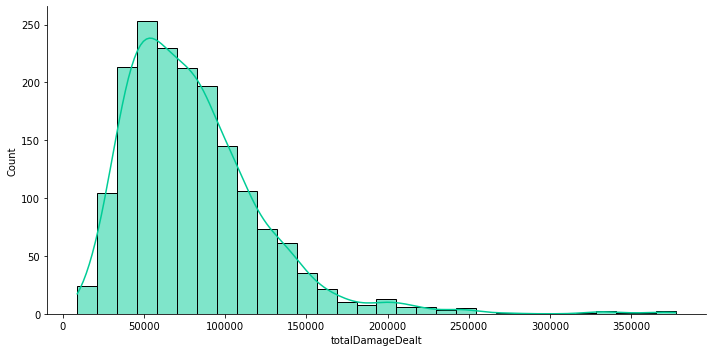

In [43]:
sns.displot(data=data.totalDamageDealt,
            aspect=2,
           bins=30,
           kde=True,
           color='#00CC96')
plt.show()

In [44]:
damage_total = data.loc[:, ('champion', 'game_duration (min)', 'totalDamageDealt', 'role')]

print('Most damage done in a game:')
display(damage_total.sort_values('totalDamageDealt', ascending=False).head())

print('Least damage done in a game:')
display(damage_total.sort_values('totalDamageDealt', ascending=True).head())

Most damage done in a game:


champion  game_duration (min)  totalDamageDealt      role
1420  Kog'Maw                36.42            377335  Marksman
1186   Graves                34.70            371276  Marksman
715   Orianna                35.68            364000      Mage
882   Taliyah                31.12            345471      Mage
1235    Sivir                29.93            331799  Marksman

Least damage done in a game:


champion  game_duration (min)  totalDamageDealt     role
1467         Braum                 9.13              8904  Support
1469         Braum                11.87             12387  Support
1222        Soraka                13.73             12791  Support
20    Fiddlesticks                 8.57             13477     Mage
1649          Bard                10.42             14574  Support

The previous chart clearly shows that as the game progresses, the more damage is dealt. There is also the trend that Supports are doing the least damage while marksmen and mages are dealing the most as game progresses. Both total damage dealt to champions and total damage dealt shows similar graphs. Damage exploration will be based on damage dealt to champions because total damage includes too many outside variables such as turret damage, damage to enemy summons, damage to minions which may not be helpful.

### Damage per Minute

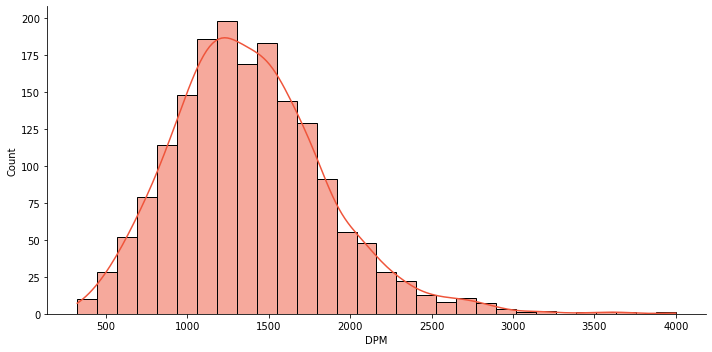

In [45]:
# creating subset of original data for damage calculations
# added dpm column
damage_chart = data.loc[:, ('champion', 'game_duration (min)', 'totalDamageDealtToChampions', 'role')]
damage_chart['DPM'] = damage_chart.totalDamageDealtToChampions / damage_chart['game_duration (min)']

sns.displot(data=damage_chart.DPM,
            aspect=2,
           bins=30,
           kde=True,
           color='#EF553B')
plt.show()

In [46]:
print('Highest DPM done in a game:')
display(damage_chart.sort_values('DPM', ascending=False).head())

print('Lowest DPM done in a game:')
display(damage_chart.sort_values('DPM', ascending=True).head())

Highest DPM done in a game:


champion  game_duration (min)  totalDamageDealtToChampions      role  \
882   Taliyah                31.12                       124434      Mage   
846      Jinx                18.80                        68485  Marksman   
781     Xayah                26.78                        97080  Marksman   
1194   Graves                19.62                        68151  Marksman   
651   Kindred                14.58                        47077  Marksman   

          DPM  
882  3,998.95  
846  3,642.82  
781  3,624.64  
1194 3,474.14  
651  3,228.14

Lowest DPM done in a game:


champion  game_duration (min)  totalDamageDealtToChampions     role  \
1226    Soraka                16.70                         5426  Support   
1653  Nautilus                15.68                         5189     Tank   
1223    Soraka                20.25                         7218  Support   
1271      Lulu                25.27                         9140  Support   
1395    Thresh                22.17                         8532  Support   

        DPM  
1226 324.91  
1653 330.86  
1223 356.44  
1271 361.74  
1395 384.90

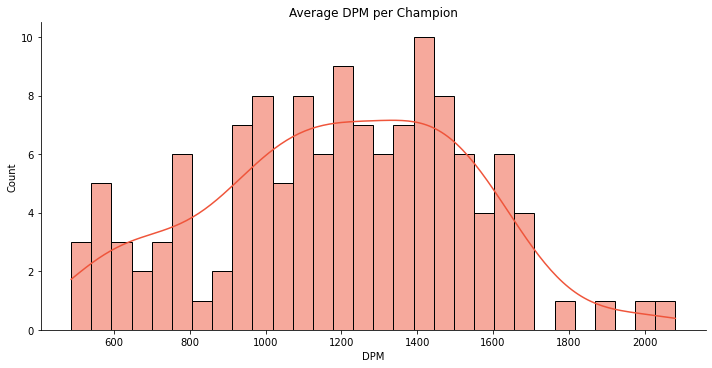

In [47]:
# average dpm per game for each champion
avg_dpm = damage_chart.groupby(['champion', 'role'], as_index=False).agg({'DPM': pd.Series.mean})

sns.displot(data=avg_dpm.DPM,
            aspect=2,
           bins=30,
           kde=True,
           color='#EF553B')
plt.title('Average DPM per Champion')
plt.show()

In [48]:
top5_dmg = avg_dpm.sort_values('DPM', ascending=False).head()
print('5 Highest DPM Champions:')
display(top5_dmg)

top5_lowest_dmg = avg_dpm.sort_values('DPM', ascending=True).head()
print('5 Lowest DPM Champions:')
top5_lowest_dmg

5 Highest DPM Champions:


champion      role      DPM
91      Seraphine      Mage 2,081.45
36   Heimerdinger      Mage 1,989.60
45        Karthus      Mage 1,915.85
26         Ezreal  Marksman 1,815.56
115        Viktor      Mage 1,685.39

5 Lowest DPM Champions:


champion     role    DPM
85      Riven  Fighter 486.87
81     Rammus     Tank 517.48
105    Thresh  Support 530.67
68   Nautilus     Tank 554.04
55      Leona     Tank 569.69

We can see that the the average DPM out of all my games would be around 1300-1400 damage/min from the histogram, as it is the most recurring and the curve being slightly normal with a right skew. Individual champion average DPM is more spread out than expected. 

Previously, we saw that out of any game, marksmen often did the most damage, but here we see that in fact mages deal more consistent damage. Why is that? From my experience, these champions (Seraphine, Heimerdinger, Karthus) may be dealing the highest DPM because of their item build. Their build would center around having their spells do damage over time (DoT) burning the enemy with magic. This would explain the high DPM because its DoT in addition to the initial magic spell. 

A point to notice would also be that Seraphine and Heimerdinger has 1 and 3 games respectively, so their DPM should be speculative. The same can be said for the 5 lowest DPM champions. They are champions I rarely play and am not very proficient on.

If we were to look at the highest DPM without Seraphine and Heimerdinger, it would be like so:

In [49]:
top5_dmg = avg_dpm.sort_values('DPM', ascending=False)
print('5 Highest DPM Champions:')
display(top5_dmg[2:7])

5 Highest DPM Champions:


champion      role      DPM
45   Karthus      Mage 1,915.85
26    Ezreal  Marksman 1,815.56
115   Viktor      Mage 1,685.39
102  Taliyah      Mage 1,675.11
87      Ryze      Mage 1,660.77

## Kills, Deaths, Assists

### Kills

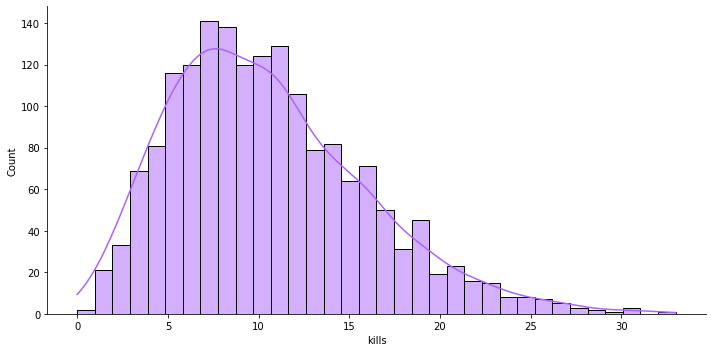

In [50]:
sns.displot(data=data.kills,
            aspect=2,
           bins=34,
           kde=True,
           color='#AB63FA')
plt.show()

In [51]:
kills = data.loc[:, ('champion', 'win', 'kills', 'role', 'game_duration (min)')]

print('Games with Most Kills: ')
display(kills.sort_values('kills', ascending=False).head())

print('Games with Least Kills: ')
kills.sort_values('kills', ascending=True).head()

Games with Most Kills: 


champion    win  kills      role  game_duration (min)
290   Leblanc   True     33  Assassin                28.08
1357   Lucian   True     31  Marksman                25.62
781     Xayah   True     31  Marksman                26.78
1364   Lucian   True     31  Marksman                20.33
1103    Corki  False     30  Marksman                27.40

Games with Least Kills: 


champion    win  kills     role  game_duration (min)
1328            Rell   True      0     Tank                18.75
1395          Thresh  False      0  Support                22.17
905   Nunu & Willump  False      1     Tank                18.35
1223          Soraka   True      1  Support                20.25
1244           Karma  False      1     Mage                14.33

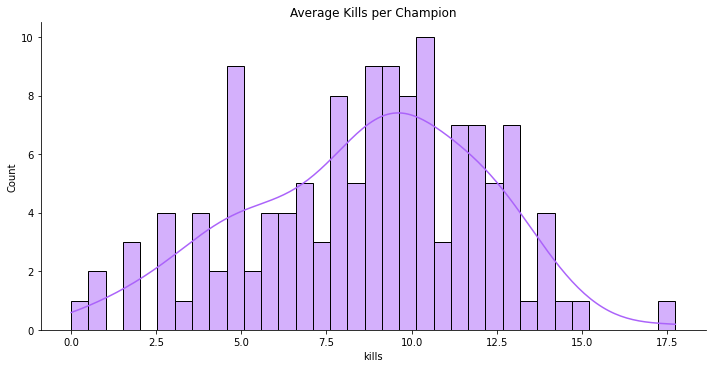

In [52]:
# average kills per game for each champion
avg_kills = kills.groupby(['champion', 'role'], as_index=False).agg({'kills': pd.Series.mean})

sns.displot(data=avg_kills.kills,
            aspect=2,
           bins=35,
           kde=True,
           color='#AB63FA')
plt.title('Average Kills per Champion')
plt.show()

In [53]:
top5_kills = avg_kills.sort_values('kills', ascending=False).head()
print('5 Champions with MOST Kills on Average:')
display(top5_kills)

low5_kills = avg_kills.sort_values('kills', ascending=True).head()
print('5 Champions with LEAST Kills on Average:')
low5_kills

5 Champions with MOST Kills on Average:


champion      role  kills
108  Tryndamere   Fighter  17.75
50      Kha'Zix  Assassin  15.00
34       Graves  Marksman  14.48
33         Gnar   Fighter  14.00
91    Seraphine      Mage  14.00

5 Champions with LEAST Kills on Average:


champion     role  kills
83      Rell     Tank   0.00
77     Poppy     Tank   1.00
81    Rammus     Tank   1.00
68  Nautilus     Tank   2.00
37    Irelia  Fighter   2.00

### Deaths

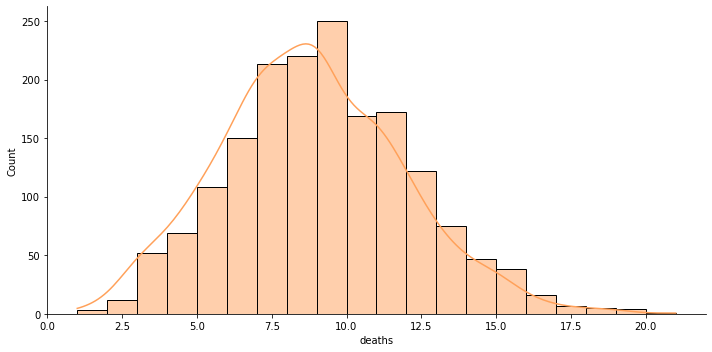

In [54]:
sns.displot(data=data.deaths,
            aspect=2,
           bins=20,
           kde=True,
           color='#FFA15A')
plt.show()

In [55]:
deaths = data.loc[:, ('champion', 'win', 'deaths', 'role', 'game_duration (min)')]

print('Games with Most Deaths: ')
display(deaths.sort_values('deaths', ascending=False).head())

print('Games with Least Deaths: ')
deaths.sort_values('deaths', ascending=True).head()

Games with Most Deaths: 


champion    win  deaths      role  game_duration (min)
550     Vayne  False      21  Marksman                28.38
1191   Graves  False      19  Marksman                31.52
1495  Kha'Zix  False      19  Assassin                29.35
1420  Kog'Maw   True      19  Marksman                36.42
1207    Shaco  False      19  Assassin                28.13

Games with Least Deaths: 


champion   win  deaths      role  game_duration (min)
1176   Graves  True       1  Marksman                 8.25
720   Orianna  True       1      Mage                 8.30
961   Nidalee  True       1  Assassin                10.02
881   Taliyah  True       2      Mage                16.15
125    Xerath  True       2      Mage                 9.57

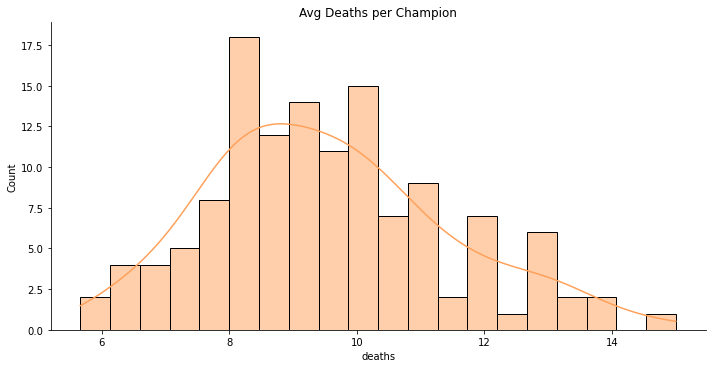

In [56]:
# average deaths per game for each champion
avg_deaths = deaths.groupby(['champion', 'role'], as_index=False).agg({'deaths': pd.Series.mean})

sns.displot(data=avg_deaths.deaths,
            aspect=2,
           bins=20,
           kde=True,
           color='#FFA15A')
plt.title('Avg Deaths per Champion')
plt.show()

In [57]:
top5_deaths = avg_deaths.sort_values('deaths', ascending=False).head()
print('5 Champions with MOST Deaths on Average:')
display(top5_deaths)

low5_deaths = avg_deaths.sort_values('deaths', ascending=True).head()
print('5 Champions with LEAST Deaths on Average:')
low5_deaths

5 Champions with MOST Deaths on Average:


champion      role  deaths
117  Volibear   Fighter   15.00
68   Nautilus      Tank   14.00
92       Sett   Fighter   14.00
123      Yone  Assassin   13.50
100     Sylas      Mage   13.14

5 Champions with LEAST Deaths on Average:


champion     role  deaths
97      Sona  Support    5.67
32     Garen  Fighter    6.00
107  Trundle  Fighter    6.25
59      Lulu  Support    6.38
120   Xerath     Mage    6.47

### Assists

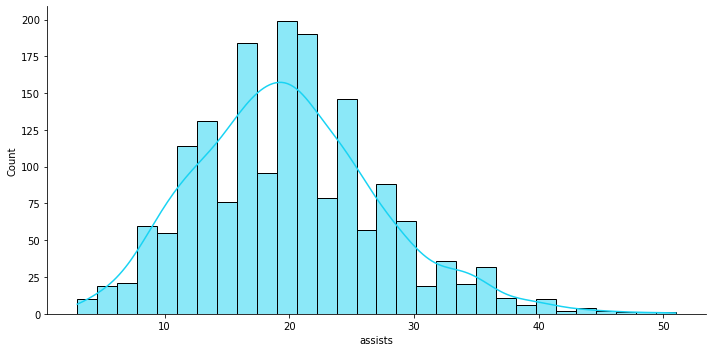

In [58]:
sns.displot(data=data.assists,
            aspect=2,
           bins=30,
           kde=True,
           color='#19D3F3')
plt.show()

In [59]:
assists = data.loc[:, ('champion', 'win', 'assists', 'role', 'game_duration (min)')]

print('Games with Most Assists: ')
display(assists.sort_values('assists', ascending=False).head())

print('Games with Least Assists: ')
assists.sort_values('assists', ascending=True).head()

Games with Most Assists: 


champion   win  assists     role  game_duration (min)
715   Orianna  True       51     Mage                35.68
1674    Janna  True       49  Support                28.57
138    Xerath  True       47     Mage                27.72
1405     Ornn  True       46     Tank                26.18
1283  Morgana  True       45     Mage                23.12

Games with Least Assists: 


champion    win  assists      role  game_duration (min)
1056   Twitch  False        3  Marksman                12.47
1666     Ahri  False        3      Mage                 8.25
667   Kindred  False        3  Marksman                12.30
258   Leblanc  False        4  Assassin                15.55
377    Kai'Sa  False        4  Marksman                16.90

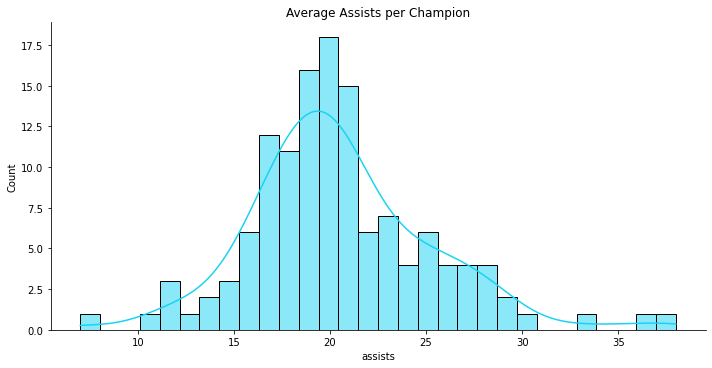

In [60]:
# average assists per game for each champion
avg_assists = assists.groupby(['champion', 'role'], as_index=False).agg({'assists': pd.Series.mean})

sns.displot(data=avg_assists.assists,
            aspect=2,
           bins=30,
           kde=True,
           color='#19D3F3')
plt.title('Average Assists per Champion')
plt.show()

In [61]:
top5_assists = avg_assists.sort_values('assists', ascending=False).head()
print('5 Champions with MOST Assists on Average:')
display(top5_assists)

low5_assists = avg_assists.sort_values('assists', ascending=True).head()
print('5 Champions with LEAST Assists on Average:')
low5_assists

5 Champions with MOST Assists on Average:


champion     role  assists
73      Olaf  Fighter    38.00
83      Rell     Tank    36.00
97      Sona  Support    32.83
98    Soraka  Support    29.75
127   Zilean  Support    29.00

5 Champions with LEAST Assists on Average:


champion      role  assists
25         Elise      Mage     7.00
85         Riven   Fighter    11.00
65   Mordekaiser   Fighter    11.50
125          Zed  Assassin    12.00
33          Gnar   Fighter    12.00

To summarize, in terms of kills, the most kills were often done by Marksmen and they often resulted in wins. The least kills were often Tanks and Supports and wins varied. On average, most kills on average were between Marksmen, Mages, Fighters and Assassins, none being better than the other. For the least kills, they were mostly Tanks. 

In terms of deaths, the most death were by Marksmen or Assassins and the least was by Mages and Marksmen. However, on average, champions that died the most were Tanks and Fighters, all melee-range champions. 

Finally, games with the most assists resulted in wins and were mostly by mages. Games with the least assists all resulted in losses which may be indicative of an enemy team that was very oppressive and hard to approach to garner an assist. As one would expect, the most assists on average goes to Supports.

A thing to notice, is that the worst part of a stat usually goes towards a role that I have a low win rate on and have very few games on the champion. 

### Overall (KDA)

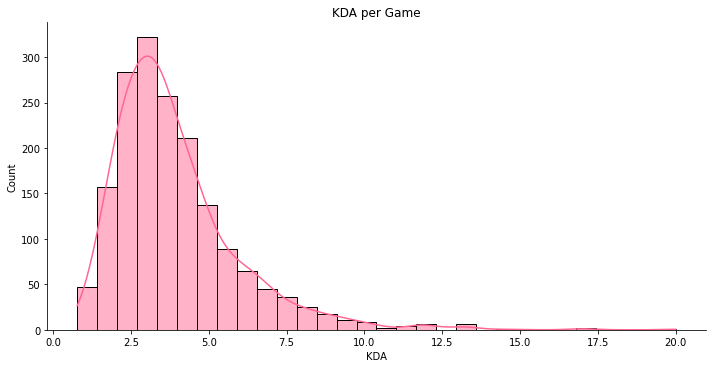

In [62]:
sns.displot(data=data.KDA,
            aspect=2,
           bins=30,
           kde=True,
           color='#FF6692')
plt.title('KDA per Game')
plt.show()

In [63]:
kda = data.loc[:, ('champion', 'win', 'KDA', 'kills', 'deaths', 'assists', 'role', 'game_duration (min)')]

print('Games with Best KDA: ')
display(kda.sort_values('KDA', ascending=False).head())

print('Games with Worst KDA: ')
kda.sort_values('KDA', ascending=True).head()

Games with Best KDA: 


champion   win   KDA  kills  deaths  assists      role  \
961  Nidalee  True 20.00     12       1        8  Assassin   
425     Jhin  True 17.00     18       3       33  Marksman   
720  Orianna  True 17.00      5       1       12      Mage   
336  Caitlyn  True 14.67     21       3       23  Marksman   
854     Jinx  True 13.50      9       2       18  Marksman   

     game_duration (min)  
961                10.02  
425                15.27  
720                 8.30  
336                15.58  
854                12.33

Games with Worst KDA: 


champion    win  KDA  kills  deaths  assists      role  \
538      Vayne  False 0.78      1       9        6  Marksman   
1656      Ahri  False 0.85      3      13        8      Mage   
235    Leblanc  False 0.85      4      13        7  Assassin   
1653  Nautilus  False 0.92      1      12       10      Tank   
1685      Sett   True 0.92      2      12        9   Fighter   

      game_duration (min)  
538                 12.45  
1656                20.92  
235                 20.28  
1653                15.68  
1685                19.17

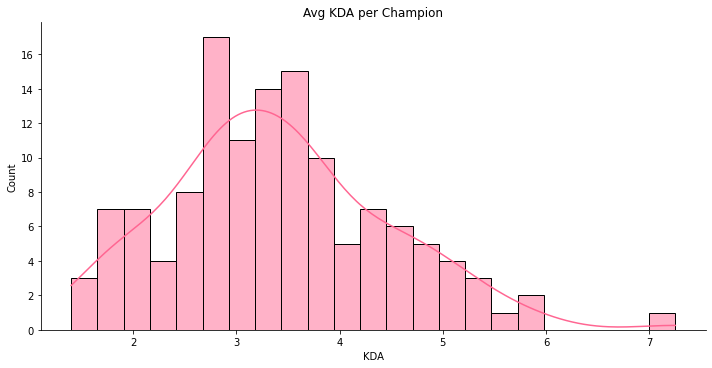

In [64]:
# average KDA per game for each champion
avg_kda = kda.groupby(['champion', 'role'], as_index=False).agg({'KDA': pd.Series.mean})

sns.displot(data=avg_kda.KDA,
            aspect=2,
           bins=23,
           kde=True,
           color='#FF6692')
plt.title('Avg KDA per Champion')
plt.show()

In [65]:
top5_kda = avg_kda.sort_values('KDA', ascending=False).head()
print('5 Champions with HIGHEST KDA on Average:')
display(top5_kda)

low5_kda = avg_kda.sort_values('KDA', ascending=True).head()
print('5 Champions with LOWEST KDA on Average:')
low5_kda

5 Champions with HIGHEST KDA on Average:


champion      role  KDA
97      Sona   Support 7.25
59      Lulu   Support 5.92
120   Xerath      Mage 5.80
40      Jhin  Marksman 5.52
60       Lux      Mage 5.45

5 Champions with LOWEST KDA on Average:


champion     role  KDA
117  Volibear  Fighter 1.40
85      Riven  Fighter 1.45
84   Renekton  Fighter 1.50
68   Nautilus     Tank 1.68
122     Yasuo  Fighter 1.69

In [66]:
cumulative_kills = kda.kills.sum()
cumulative_deaths = kda.deaths.sum()
cumulative_assists = kda.assists.sum()
print(f'cumulative score: {cumulative_kills}/{cumulative_deaths}/{cumulative_assists}')

cumulative_kda = (cumulative_kills + cumulative_assists) / cumulative_deaths
print(f'cumulative KDA: {cumulative_kda:.3}')

cumulative score: 18121/15211/34555
cumulative KDA: 3.46


## Kill Sprees

Kill Sprees are considered how many times one kills consecutively before they die.

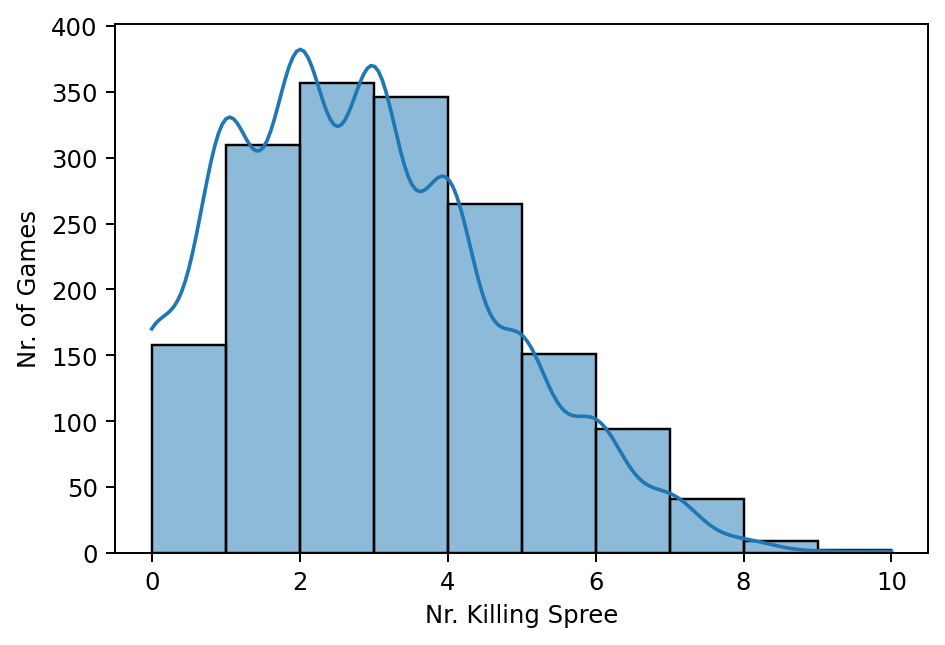

In [67]:
plt.figure(dpi=175)
sns.histplot(data=data,
             x='killingSprees',
             kde=True,
           bins=10)

plt.xlabel('Nr. Killing Spree')
plt.ylabel('Nr. of Games')
plt.show()

Max Killing Spree is the longest Killing Spree one goes before they die.

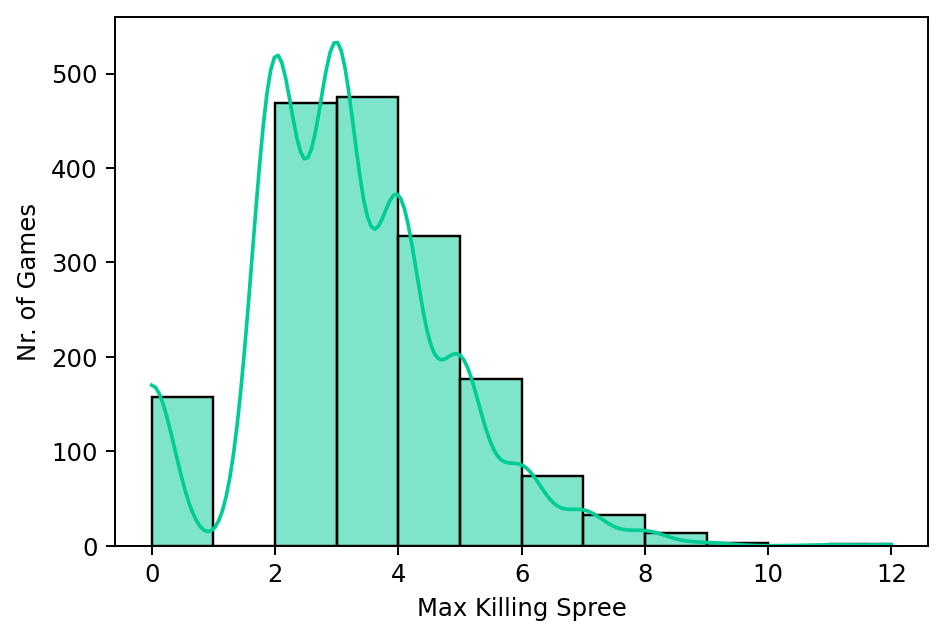

In [68]:
plt.figure(dpi=175)
sns.histplot(data=data,
             x='largestKillingSpree',
             kde=True,
             bins=12,
             color='#00CC96')

plt.xlabel('Max Killing Spree')
plt.ylabel('Nr. of Games')
plt.show()

In [69]:
multi_kill = pd.DataFrame(data=data[['doubleKills', 'tripleKills', 'quadraKills', 'pentaKills']].sum(),
                         columns=['nr_games'])
multi_kill.reset_index(inplace=True)
multi_kill.rename(columns={'index': 'kill_type'}, inplace=True)

In [70]:
colors = ['lightslategray',] * 5
colors[0] = 'crimson'

multi_kill_fig = px.bar(multi_kill,
                       x='kill_type',
                       y='nr_games',
                       text='nr_games',
                       color='kill_type',
                       color_discrete_map={'doubleKills': 'crimson',
                                          'tripleKills': '#636EFA',
                                          'quadraKills': '#636EFA',
                                          'pentaKills': '#636EFA'})
multi_kill_fig.update_traces(textposition='outside')
multi_kill_fig.update_layout(xaxis_title='Kill Type',
                            yaxis_title='Nr. of Games', 
                            title='Total Multi-Kills')

multi_kill_fig.show()

Kill type is consecutive kills in a short time span.

Double Kills occur significantly more often compared to the others. This is because it is easier to get compared to something like a Penta Kill where I would have to get kills on 5 people consecutively in a fight. It can also be implied that I don't go for them exactly and play a more safer playstyle where I am fine with just getting 2 straight kills and backing off.

## Damage Taken

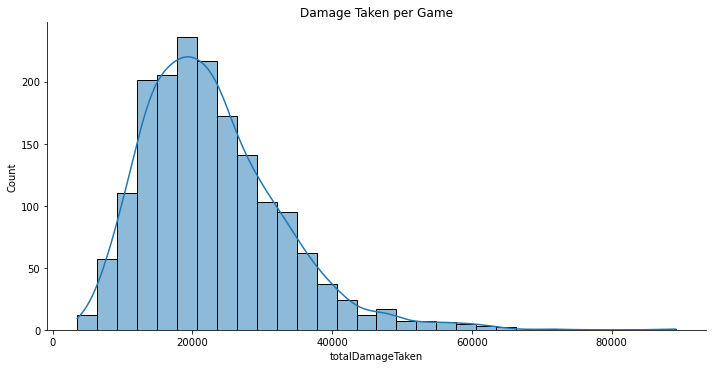

In [71]:
sns.displot(data=data.totalDamageTaken,
            aspect=2,
           bins=30,
           kde=True,
           color='#1F77B4')
plt.title('Damage Taken per Game')
plt.show()

In [72]:
dmg_taken = data.loc[:, ('champion', 'win', 'totalDamageTaken', 'role', 'game_duration (min)')]

print('Games with MOST Damage Taken: ')
display(dmg_taken.sort_values('totalDamageTaken', ascending=False).head())

print('Games with LEAST Damage Taken: ')
dmg_taken.sort_values('totalDamageTaken', ascending=True).head()

Games with MOST Damage Taken: 


champion    win  totalDamageTaken      role  game_duration (min)
1512      Amumu  False             89137      Tank                31.92
1480     Yorick   True             71232   Fighter                26.42
1186     Graves   True             64265  Marksman                34.70
1529  Dr. Mundo  False             63872   Fighter                22.28
1422    Kog'Maw  False             61496  Marksman                42.30

Games with LEAST Damage Taken: 


champion   win  totalDamageTaken      role  game_duration (min)
1616  Miss Fortune  True              3525  Marksman                 7.17
720        Orianna  True              4023      Mage                 8.30
125         Xerath  True              4502      Mage                 9.57
199           Azir  True              4698      Mage                 8.32
1176        Graves  True              4760  Marksman                 8.25

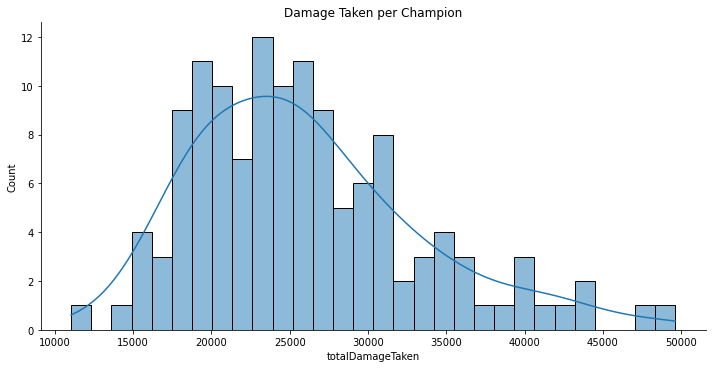

In [73]:
# average damage taken per game for each champion
avg_dmg_taken = dmg_taken.groupby(['champion', 'role'], as_index=False).agg({'totalDamageTaken': pd.Series.mean})

sns.displot(data=avg_dmg_taken.totalDamageTaken,
            aspect=2,
           bins=30,
           kde=True,
           color='#1F77B4')
plt.title('Damage Taken per Champion')
plt.show()

In [74]:
top5_dmg_taken = avg_dmg_taken.sort_values('totalDamageTaken', ascending=False).head()
print('5 Champions with MOST Damage Taken on Average:')
display(top5_dmg_taken)

low5_dmg_taken = avg_dmg_taken.sort_values('totalDamageTaken', ascending=True).head()
print('5 Champions with LEAST Damage Taken on Average:')
low5_dmg_taken

5 Champions with MOST Damage Taken on Average:


champion     role  totalDamageTaken
118  Warwick  Fighter         49,625.00
33      Gnar  Fighter         47,175.00
4      Amumu     Tank         43,519.67
92      Sett  Fighter         43,485.83
73      Olaf  Fighter         42,969.00

5 Champions with LEAST Damage Taken on Average:


champion     role  totalDamageTaken
25      Elise     Mage         11,042.00
114   Vel'Koz     Mage         14,852.50
120    Xerath     Mage         15,234.00
59       Lulu  Support         15,338.15
62   Malzahar     Mage         15,570.88

## Utility

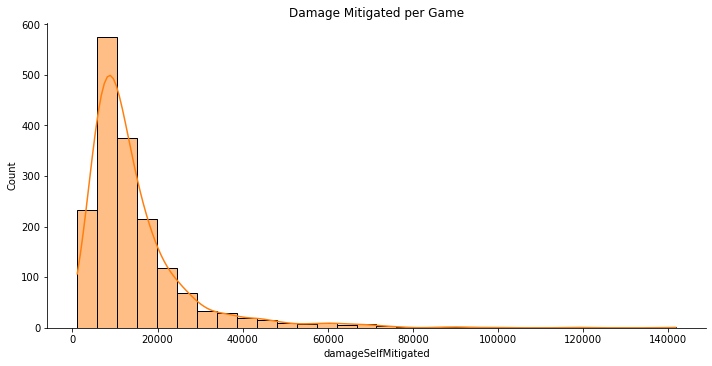

In [75]:
sns.displot(data=data.damageSelfMitigated,
            aspect=2,
           bins=30,
           kde=True,
           color='#FF7F0E')
plt.title('Damage Mitigated per Game')
plt.show()

### Damage Mitigation

In [76]:
dmg_mitigated = data.loc[:, ('champion', 'win', 'damageSelfMitigated', 'role', 'game_duration (min)')]

print('Games with MOST Damage Mitigated: ')
display(dmg_mitigated.sort_values('damageSelfMitigated', ascending=False).head())

print('Games with LEAST Damage Mitigated: ')
dmg_mitigated.sort_values('damageSelfMitigated', ascending=True).head()

Games with MOST Damage Mitigated: 


champion    win  damageSelfMitigated     role  game_duration (min)
1512     Amumu  False               141719     Tank                31.92
1405      Ornn   True               118938     Tank                26.18
1276  Pantheon   True                98915  Fighter                28.13
1491      Shen   True                91798     Tank                25.68
1687      Sett  False                89997  Fighter                26.68

Games with LEAST Damage Mitigated: 


champion    win  damageSelfMitigated      role  game_duration (min)
1616  Miss Fortune   True                 1122  Marksman                 7.17
125         Xerath   True                 1581      Mage                 9.57
199           Azir   True                 1670      Mage                 8.32
946         Ezreal  False                 1839  Marksman                 8.60
720        Orianna   True                 1864      Mage                 8.30

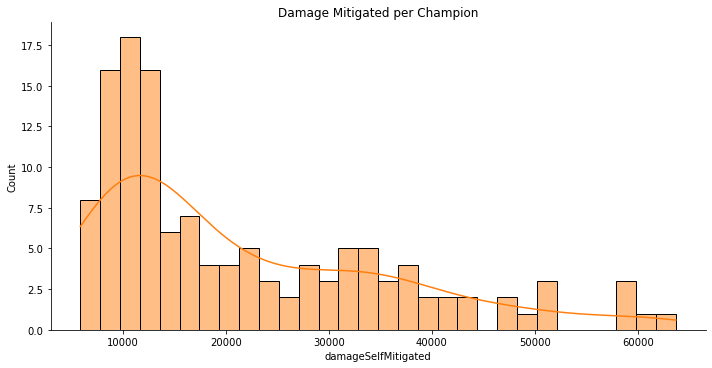

In [77]:
# average damage mitigated per game for each champion
avg_dmg_mit = dmg_mitigated.groupby(['champion', 'role'], as_index=False).agg({'damageSelfMitigated': pd.Series.mean})

sns.displot(data=avg_dmg_mit.damageSelfMitigated,
            aspect=2,
           bins=30,
           kde=True,
           color='#FF7F0E')
plt.title('Damage Mitigated per Champion')
plt.show()

In [78]:
top5_dmg_mit = avg_dmg_mit.sort_values('damageSelfMitigated', ascending=False).head()
print('5 Champions with MOST Damage Mitigated on Average:')
display(top5_dmg_mit)

low5_dmg_mit = avg_dmg_mit.sort_values('damageSelfMitigated', ascending=True).head()
print('5 Champions with LEAST Damage Mitigated on Average:')
low5_dmg_mit

5 Champions with MOST Damage Mitigated on Average:


champion     role  damageSelfMitigated
118  Warwick  Fighter            63,679.00
89   Sejuani     Tank            61,569.00
4      Amumu     Tank            59,585.00
73      Olaf  Fighter            59,377.00
92      Sett  Fighter            58,104.83

5 Champions with LEAST Damage Mitigated on Average:


champion     role  damageSelfMitigated
114  Vel'Koz     Mage             5,881.00
120   Xerath     Mage             6,198.41
25     Elise     Mage             6,374.00
127   Zilean  Support             7,117.83
126    Ziggs     Mage             7,362.33

### Heal

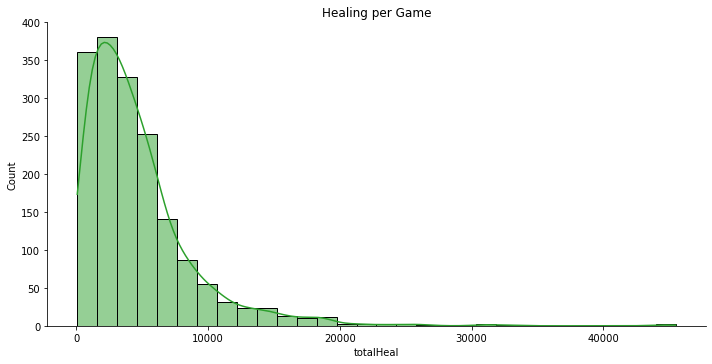

In [79]:
sns.displot(data=data.totalHeal,
            aspect=2,
           bins=30,
           kde=True,
           color='#2CA02C')
plt.title('Healing per Game')
plt.show()

In [80]:
heal = data.loc[:, ('champion', 'win', 'totalHeal', 'role', 'game_duration (min)')]

print('Games with MOST Healing: ')
display(heal.sort_values('totalHeal', ascending=False).head())

print('Games with LEAST Healing: ')
heal.sort_values('totalHeal', ascending=True).head()

Games with MOST Healing: 


champion    win  totalHeal      role  game_duration (min)
1225   Soraka  False      45486   Support                30.13
1221   Soraka   True      44208   Support                26.83
1186   Graves   True      33062  Marksman                34.70
1674    Janna   True      31277   Support                28.57
1224   Soraka  False      30906   Support                18.82

Games with LEAST Healing: 


champion    win  totalHeal      role  game_duration (min)
1653  Nautilus  False         62      Tank                15.68
1346    Lucian  False         69  Marksman                21.00
3       Anivia  False        119      Mage                12.72
695    Orianna   True        125      Mage                12.25
720    Orianna   True        138      Mage                 8.30

You might find it weird to find that a marksman is did one of the most heals in a game. This is most likely because the build was centered around lifesteal i.e. you heal a certain amount of health when you damage someone. 

One would expect 0 healing for the least healing in any game and the chart is contrary to this assumption. The reason is because there of the rune system in League of Legends. It is a sort of innate strength system where you can select for more attack speed over time, minor healing when damaging enemies, faster mana regeneration etc. In my case, in ARAM, I usually take some sort of minor healing for better sustain every game.

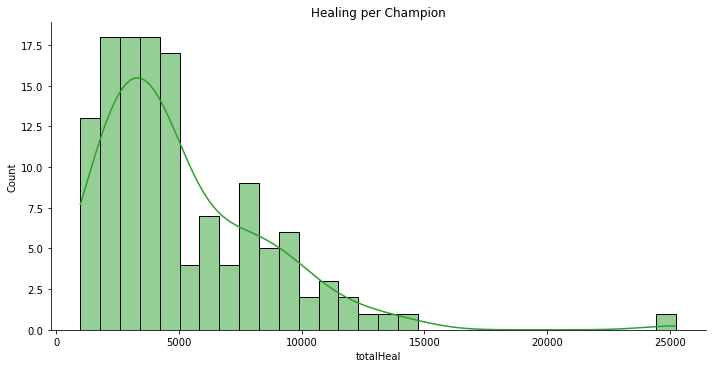

In [81]:
# average healing per game for each champion
avg_heal = heal.groupby(['champion', 'role'], as_index=False).agg({'totalHeal': pd.Series.mean})

sns.displot(data=avg_heal.totalHeal,
            aspect=2,
           bins=30,
           kde=True,
           color='#2CA02C')
plt.title('Healing per Champion')
plt.show()

In [82]:
top5_heal = avg_heal.sort_values('totalHeal', ascending=False).head()
print('5 Champions with MOST Healing on Average:')
display(top5_heal)

low5_heal = avg_heal.sort_values('totalHeal', ascending=True).head()
print('5 Champions with LEAST Healing on Average:')
low5_heal

5 Champions with MOST Healing on Average:


champion     role  totalHeal
98       Soraka  Support  25,248.50
118     Warwick  Fighter  14,528.00
116    Vladimir     Mage  13,640.33
97         Sona  Support  12,856.00
108  Tryndamere  Fighter  12,227.00

5 Champions with LEAST Healing on Average:


champion      role  totalHeal
117  Volibear   Fighter     981.00
56     Lillia   Fighter     986.60
81     Rammus      Tank   1,171.00
58     Lucian  Marksman   1,249.65
30      Galio      Tank   1,271.00

### Crowd Control (CC)

#### Number of CC

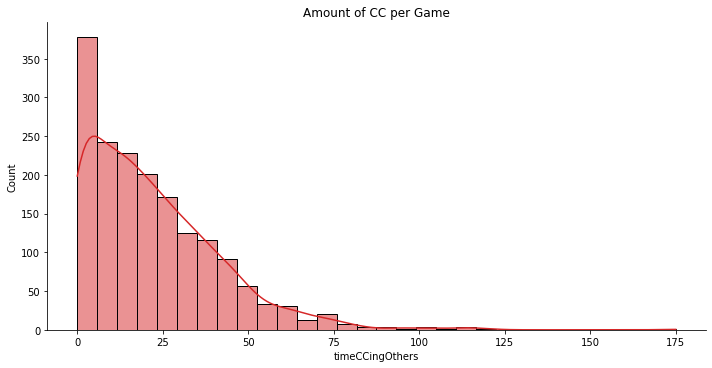

In [83]:
sns.displot(data=data.timeCCingOthers,
            aspect=2,
           bins=30,
           kde=True,
           color='#D62728')
plt.title('Amount of CC per Game')
plt.show()

In [84]:
cc_nr = data.loc[:, ('champion', 'win', 'timeCCingOthers', 'role', 'game_duration (min)')]

print('Games with MOST CC: ')
display(cc_nr.sort_values('timeCCingOthers', ascending=False).head())

Games with MOST CC: 


champion    win  timeCCingOthers      role  game_duration (min)
1478  Nocturne  False              175  Assassin                23.47
1225    Soraka  False              120   Support                30.13
1477  Nocturne   True              116  Assassin                17.83
1476  Nocturne  False              116  Assassin                19.48
1543     Neeko  False              113      Mage                21.53

This was a little puzzling to me. The only CC I know Nocturne can do is a fear on one ability and his ultimate is could also be considered a form of CC. Yet how did he get 3 out of the 5 most CC. The only reason I can think of is because I built him with an item that causes his abilities to induce a slow on enemies. Even then, that many times is surprising. 

Needless to say, the least CC would be 0 because not every champion can CC others. For example, Marksmen usually don't have a form of CC, only damage and some sort of mobility or attack steroid to increase their base damage or attack speed. 

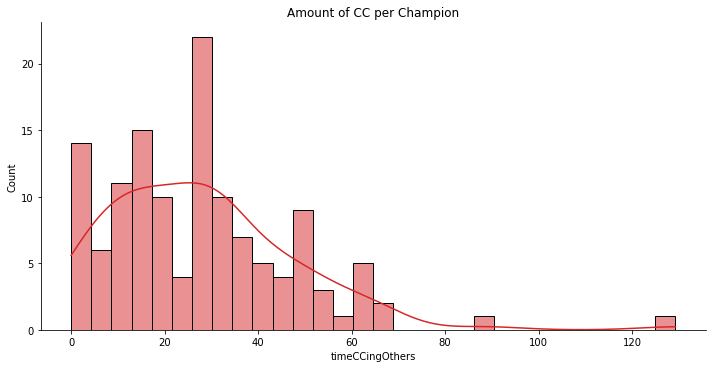

In [85]:
# average number of CC per game for each champion
avg_cc_nr = cc_nr.groupby(['champion', 'role'], as_index=False).agg({'timeCCingOthers': pd.Series.mean})

sns.displot(data=avg_cc_nr.timeCCingOthers,
            aspect=2,
           bins=30,
           kde=True,
           color='#D62728')
plt.title('Amount of CC per Champion')
plt.show()

In [86]:
top5_cc_nr = avg_cc_nr.sort_values('timeCCingOthers', ascending=False).head()
print('5 Champions with MOST CC on Average:')
display(top5_cc_nr)

low5_cc_nr = avg_cc_nr.sort_values('timeCCingOthers', ascending=True).head()
print('5 Champions with LEAST CC on Average:')
low5_cc_nr

5 Champions with MOST CC on Average:


champion      role  timeCCingOthers
71  Nocturne  Assassin           129.25
18  Cho'Gath      Tank            88.67
68  Nautilus      Tank            67.33
66   Morgana      Mage            67.22
63    Maokai      Tank            64.50

5 Champions with LEAST CC on Average:


champion      role  timeCCingOthers
70  Nidalee  Assassin             0.00
42   Kai'Sa  Marksman             0.08
58   Lucian  Marksman             0.42
96    Sivir  Marksman             0.92
95  Shyvana   Fighter             1.00

#### CC Time

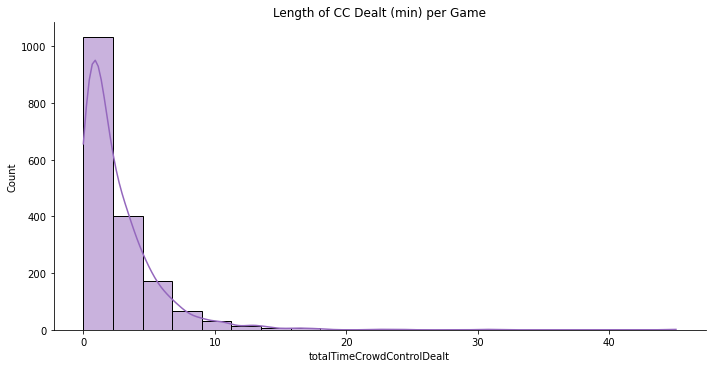

In [87]:
sns.displot(data=data.totalTimeCrowdControlDealt /60,
            aspect=2,
           bins=20,
           kde=True,
           color='#9467BD')
plt.title('Length of CC Dealt (min) per Game')
plt.show()

In [88]:
cc_time = data.loc[:, ('champion', 'win', 'totalTimeCrowdControlDealt', 'role', 'game_duration (min)')]
cc_time.totalTimeCrowdControlDealt = cc_time.totalTimeCrowdControlDealt / 60

print('Games with LONGEST CC (min): ')
display(cc_time.sort_values('totalTimeCrowdControlDealt', ascending=False).head())

Games with LONGEST CC (min): 


champion    win  totalTimeCrowdControlDealt      role  \
1405        Ornn   True                       45.08      Tank   
1413  Blitzcrank  False                       30.67      Tank   
1485    Cho'Gath  False                       23.97      Tank   
1081       Corki  False                       22.47  Marksman   
1404        Ornn   True                       18.25      Tank   

      game_duration (min)  
1405                26.18  
1413                24.28  
1485                20.07  
1081                18.38  
1404                21.30

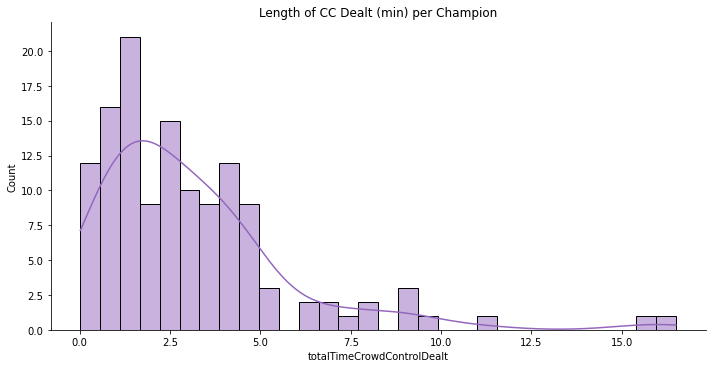

In [89]:
# average length of CC per game for each champion
avg_cc_time = cc_time.groupby(['champion', 'role'], as_index=False).agg({'totalTimeCrowdControlDealt': pd.Series.mean})

sns.displot(data=avg_cc_time.totalTimeCrowdControlDealt,
            aspect=2,
           bins=30,
           kde=True,
           color='#9467BD')
plt.title('Length of CC Dealt (min) per Champion')
plt.show()

In [90]:
top5_cc_time = avg_cc_time.sort_values('totalTimeCrowdControlDealt', ascending=False).head()
print('5 Champions with MOST CC on Average (min):')
display(top5_cc_time)

low5_cc_time = avg_cc_time.sort_values('totalTimeCrowdControlDealt', ascending=True).head()
print('5 Champions with LEAST CC on Average (min):')
low5_cc_time

5 Champions with MOST CC on Average (min):


champion      role  totalTimeCrowdControlDealt
61  Malphite      Tank                       16.50
75      Ornn      Tank                       15.49
18  Cho'Gath      Tank                       11.08
8       Ashe  Marksman                        9.49
5     Anivia      Mage                        9.30

5 Champions with LEAST CC on Average (min):


champion      role  totalTimeCrowdControlDealt
95  Shyvana   Fighter                        0.02
70  Nidalee  Assassin                        0.10
42   Kai'Sa  Marksman                        0.15
58   Lucian  Marksman                        0.24
96    Sivir  Marksman                        0.27

## By Roles

The density shown on the graphs are by the number of champions with those stat numbers. It is not by game.

In [91]:
champ_time = data.groupby('champion', as_index=False).agg({'game_duration (min)': pd.Series.mean})
champ_gold = data.groupby('champion', as_index=False).agg({'goldSpent': pd.Series.mean})
dmg_to_champ = data.groupby('champion', as_index=False).agg({'totalDamageDealtToChampions': pd.Series.mean})

In [92]:
# creating dataframe of averages per champion
avg_stats = avg_dpm.merge(avg_kda, on=['champion', 'role'])
avg_stats = avg_stats.merge(dmg_to_champ, on='champion')
avg_stats = avg_stats.merge(avg_kills, on=['champion', 'role'])
avg_stats = avg_stats.merge(avg_deaths, on=['champion', 'role'])
avg_stats = avg_stats.merge(avg_assists, on=['champion', 'role'])
avg_stats = avg_stats.merge(avg_dmg_taken, on=['champion', 'role'])
avg_stats = avg_stats.merge(avg_dmg_mit, on=['champion', 'role'])
avg_stats = avg_stats.merge(avg_heal, on=['champion', 'role'])
avg_stats = avg_stats.merge(avg_cc_nr, on=['champion', 'role'])
avg_stats = avg_stats.merge(avg_cc_time, on=['champion', 'role'])
avg_stats = avg_stats.merge(champ_time, on='champion')
avg_stats = avg_stats.merge(champ_gold, on='champion')
avg_stats = avg_stats.merge(champion_data[['champion','winrate']], on='champion')

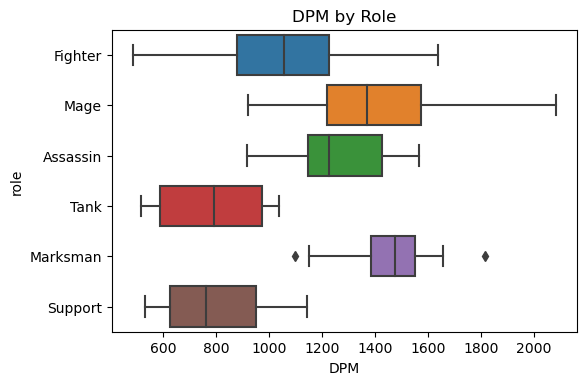

In [93]:
plt.figure(dpi=100)
sns.boxplot(data=avg_stats,
           y='role',
           x='DPM',
           orient='h')
plt.title('DPM by Role')
plt.show()

Marksman and Mages for me are the roles that deal the most consistent damage. Tanks and Supports do the least. This aligns with how the roles are supposed to be played: damage dealers providing damage while the others create space and assist the damage dealers. In order of highest to lowest: Marksmen, Mages, Assassins, Fighter, Tank, Support. Although Mages has more range than Marksmen which deals more consistent DPM.

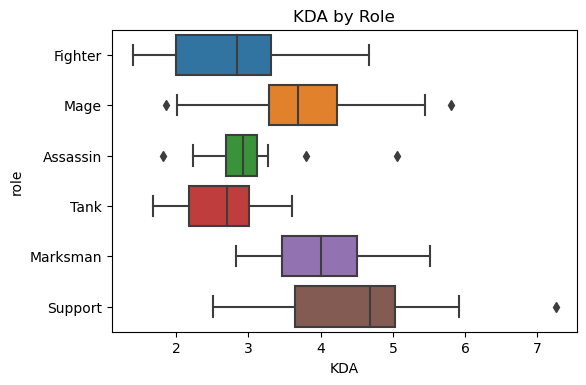

In [94]:
plt.figure(dpi=100)
sns.boxplot(data=avg_stats,
           y='role',
           x='KDA',
           orient='h')
plt.title('KDA by Role')
plt.show()

Supports have a wider range of KDA and more spread out. My assassins are more consistent in KDA 

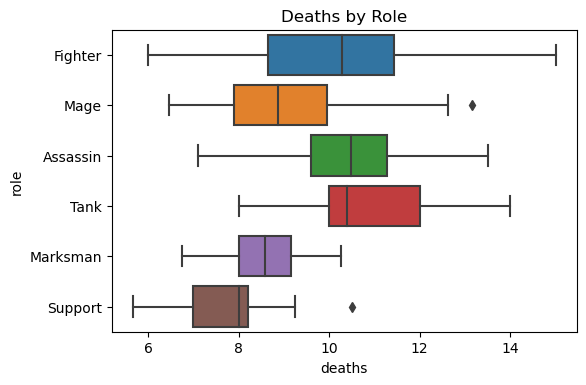

In [95]:
plt.figure(dpi=100)
sns.boxplot(data=avg_stats,
           y='role',
           x='deaths',
           orient='h')
plt.title('Deaths by Role')
plt.show()

I tend to die more often on Fighter, Tanks, and Assassins. 

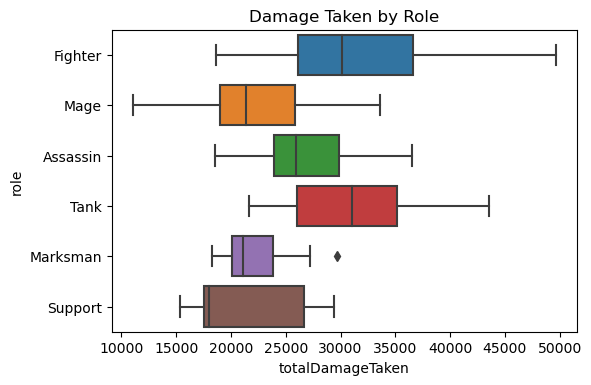

In [96]:
plt.figure(dpi=100)
sns.boxplot(data=avg_stats,
           y='role',
           x='totalDamageTaken',
           orient='h')
plt.title('Damage Taken by Role')
plt.show()

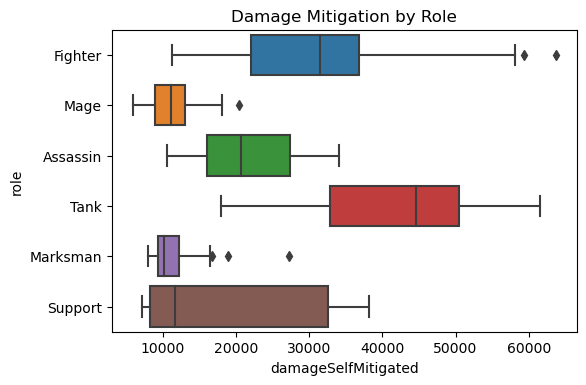

In [97]:
plt.figure(dpi=100)
sns.boxplot(data=avg_stats,
           y='role',
           x='damageSelfMitigated',
           orient='h')
plt.title('Damage Mitigation by Role')
plt.show()

Marksmen and Mages show a significant spike to the left compared to the other roles. This due to not building armor and magic resist to resist enemy damage and going for straight damage builds. This is so I can kill the enemy before they can kill me and also to break through the enemies defenses if they build defensively.

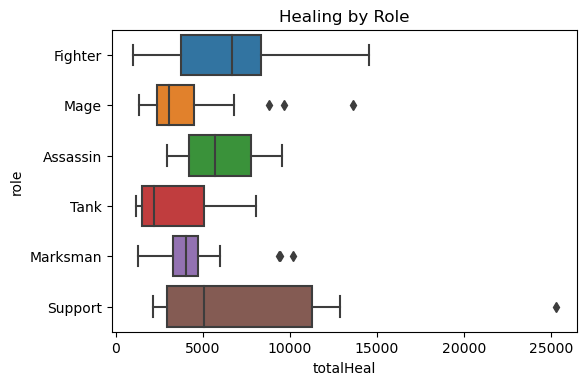

In [98]:
plt.figure(dpi=100)
sns.boxplot(data=avg_stats,
           y='role',
           x='totalHeal',
           orient='h')
plt.title('Healing by Role')
plt.show()

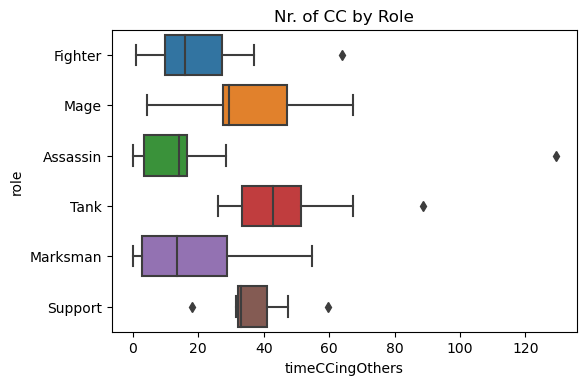

In [99]:
plt.figure(dpi=100)
sns.boxplot(data=avg_stats,
           y='role',
           x='timeCCingOthers',
           orient='h')
plt.title('Nr. of CC by Role')
plt.show()

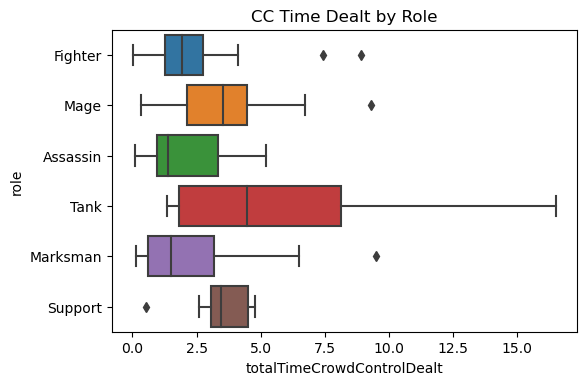

In [100]:
plt.figure(dpi=100)
sns.boxplot(data=avg_stats,
           y='role',
           x='totalTimeCrowdControlDealt',
           orient='h')
plt.title('CC Time Dealt by Role')
plt.show()

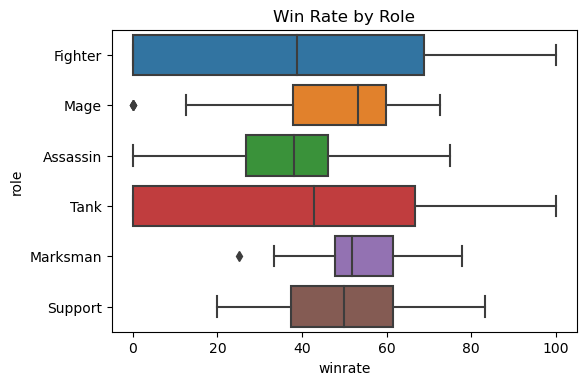

In [101]:
plt.figure(dpi=100)
sns.boxplot(data=avg_stats,
           y='role',
           x='winrate',
           orient='h')
plt.title('Win Rate by Role')
plt.show()

#  Scatterplots

Here a champion stat is plotted against their win rate.

In [102]:
fig1 = px.scatter(avg_stats,
                  x='DPM',
                  y='winrate',
                  color='role',
                  size='DPM',
                  opacity=0.6,
                  height=650,
                  hover_data=['champion'],
                  color_discrete_map={'Mage': '#EF553B',
                                      'Marksman': '#636EFA',
                                      'Assassin': '#00CC96',
                                      'Fighter': '#AB63FA',
                                      'Support': '#FFA15A',
                                      'Tank': '#19D3F3'})
fig1.update_layout(title='Champion DPM vs. Win-Rate',
                             xaxis_title='Damage per Minute',
                             yaxis_title='Win-Rate (%)')
fig1.show()

In [103]:
fig2 = px.scatter(avg_stats,
                  x='KDA',
                  y='winrate',
                  color='role',
                  size='DPM',
                  opacity=0.6,
                  height=650,
                  hover_data=['champion'],
                  color_discrete_map={'Mage': '#EF553B',
                                      'Marksman': '#636EFA',
                                      'Assassin': '#00CC96',
                                      'Fighter': '#AB63FA',
                                      'Support': '#FFA15A',
                                      'Tank': '#19D3F3'})
fig2.update_layout(title='Champion KDA vs. Win-Rate',
                             xaxis_title='KDA',
                             yaxis_title='Win-Rate (%)')
fig2.show()

In [104]:
fig3 = px.scatter(avg_stats,
                  x='totalDamageTaken',
                  y='winrate',
                  color='role',
                  size='totalDamageTaken',
                  opacity=0.6,
                  height=650,
                  hover_data=['champion'],
                  color_discrete_map={'Mage': '#EF553B',
                                      'Marksman': '#636EFA',
                                      'Assassin': '#00CC96',
                                      'Fighter': '#AB63FA',
                                      'Support': '#FFA15A',
                                      'Tank': '#19D3F3'})
fig3.update_layout(title='Champion Damage Taken vs. Win-Rate',
                             xaxis_title='Damage Taken',
                             yaxis_title='Win-Rate (%)')
fig3.show()

In [105]:
fig4 = px.scatter(avg_stats,
                  x='totalTimeCrowdControlDealt',
                  y='winrate',
                  color='role',
                  size='totalTimeCrowdControlDealt',
                  opacity=0.6,
                  height=650,
                  hover_data=['champion'],
                  color_discrete_map={'Mage': '#EF553B',
                                      'Marksman': '#636EFA',
                                      'Assassin': '#00CC96',
                                      'Fighter': '#AB63FA',
                                      'Support': '#FFA15A',
                                      'Tank': '#19D3F3'})
fig4.update_layout(title='Length of Crowd Control vs. Win-Rate',
                             xaxis_title='Minute',
                             yaxis_title='Win-Rate (%)')
fig4.show()

# Linear Regression

I wanted to see if their was a model for determing a champions win rate for me. I used the average stats for each champion dataset because that way I can see their win rate. If I used the original data, win/loss would be just a 0 or 1 which I assumed to not be helpful in a regression.

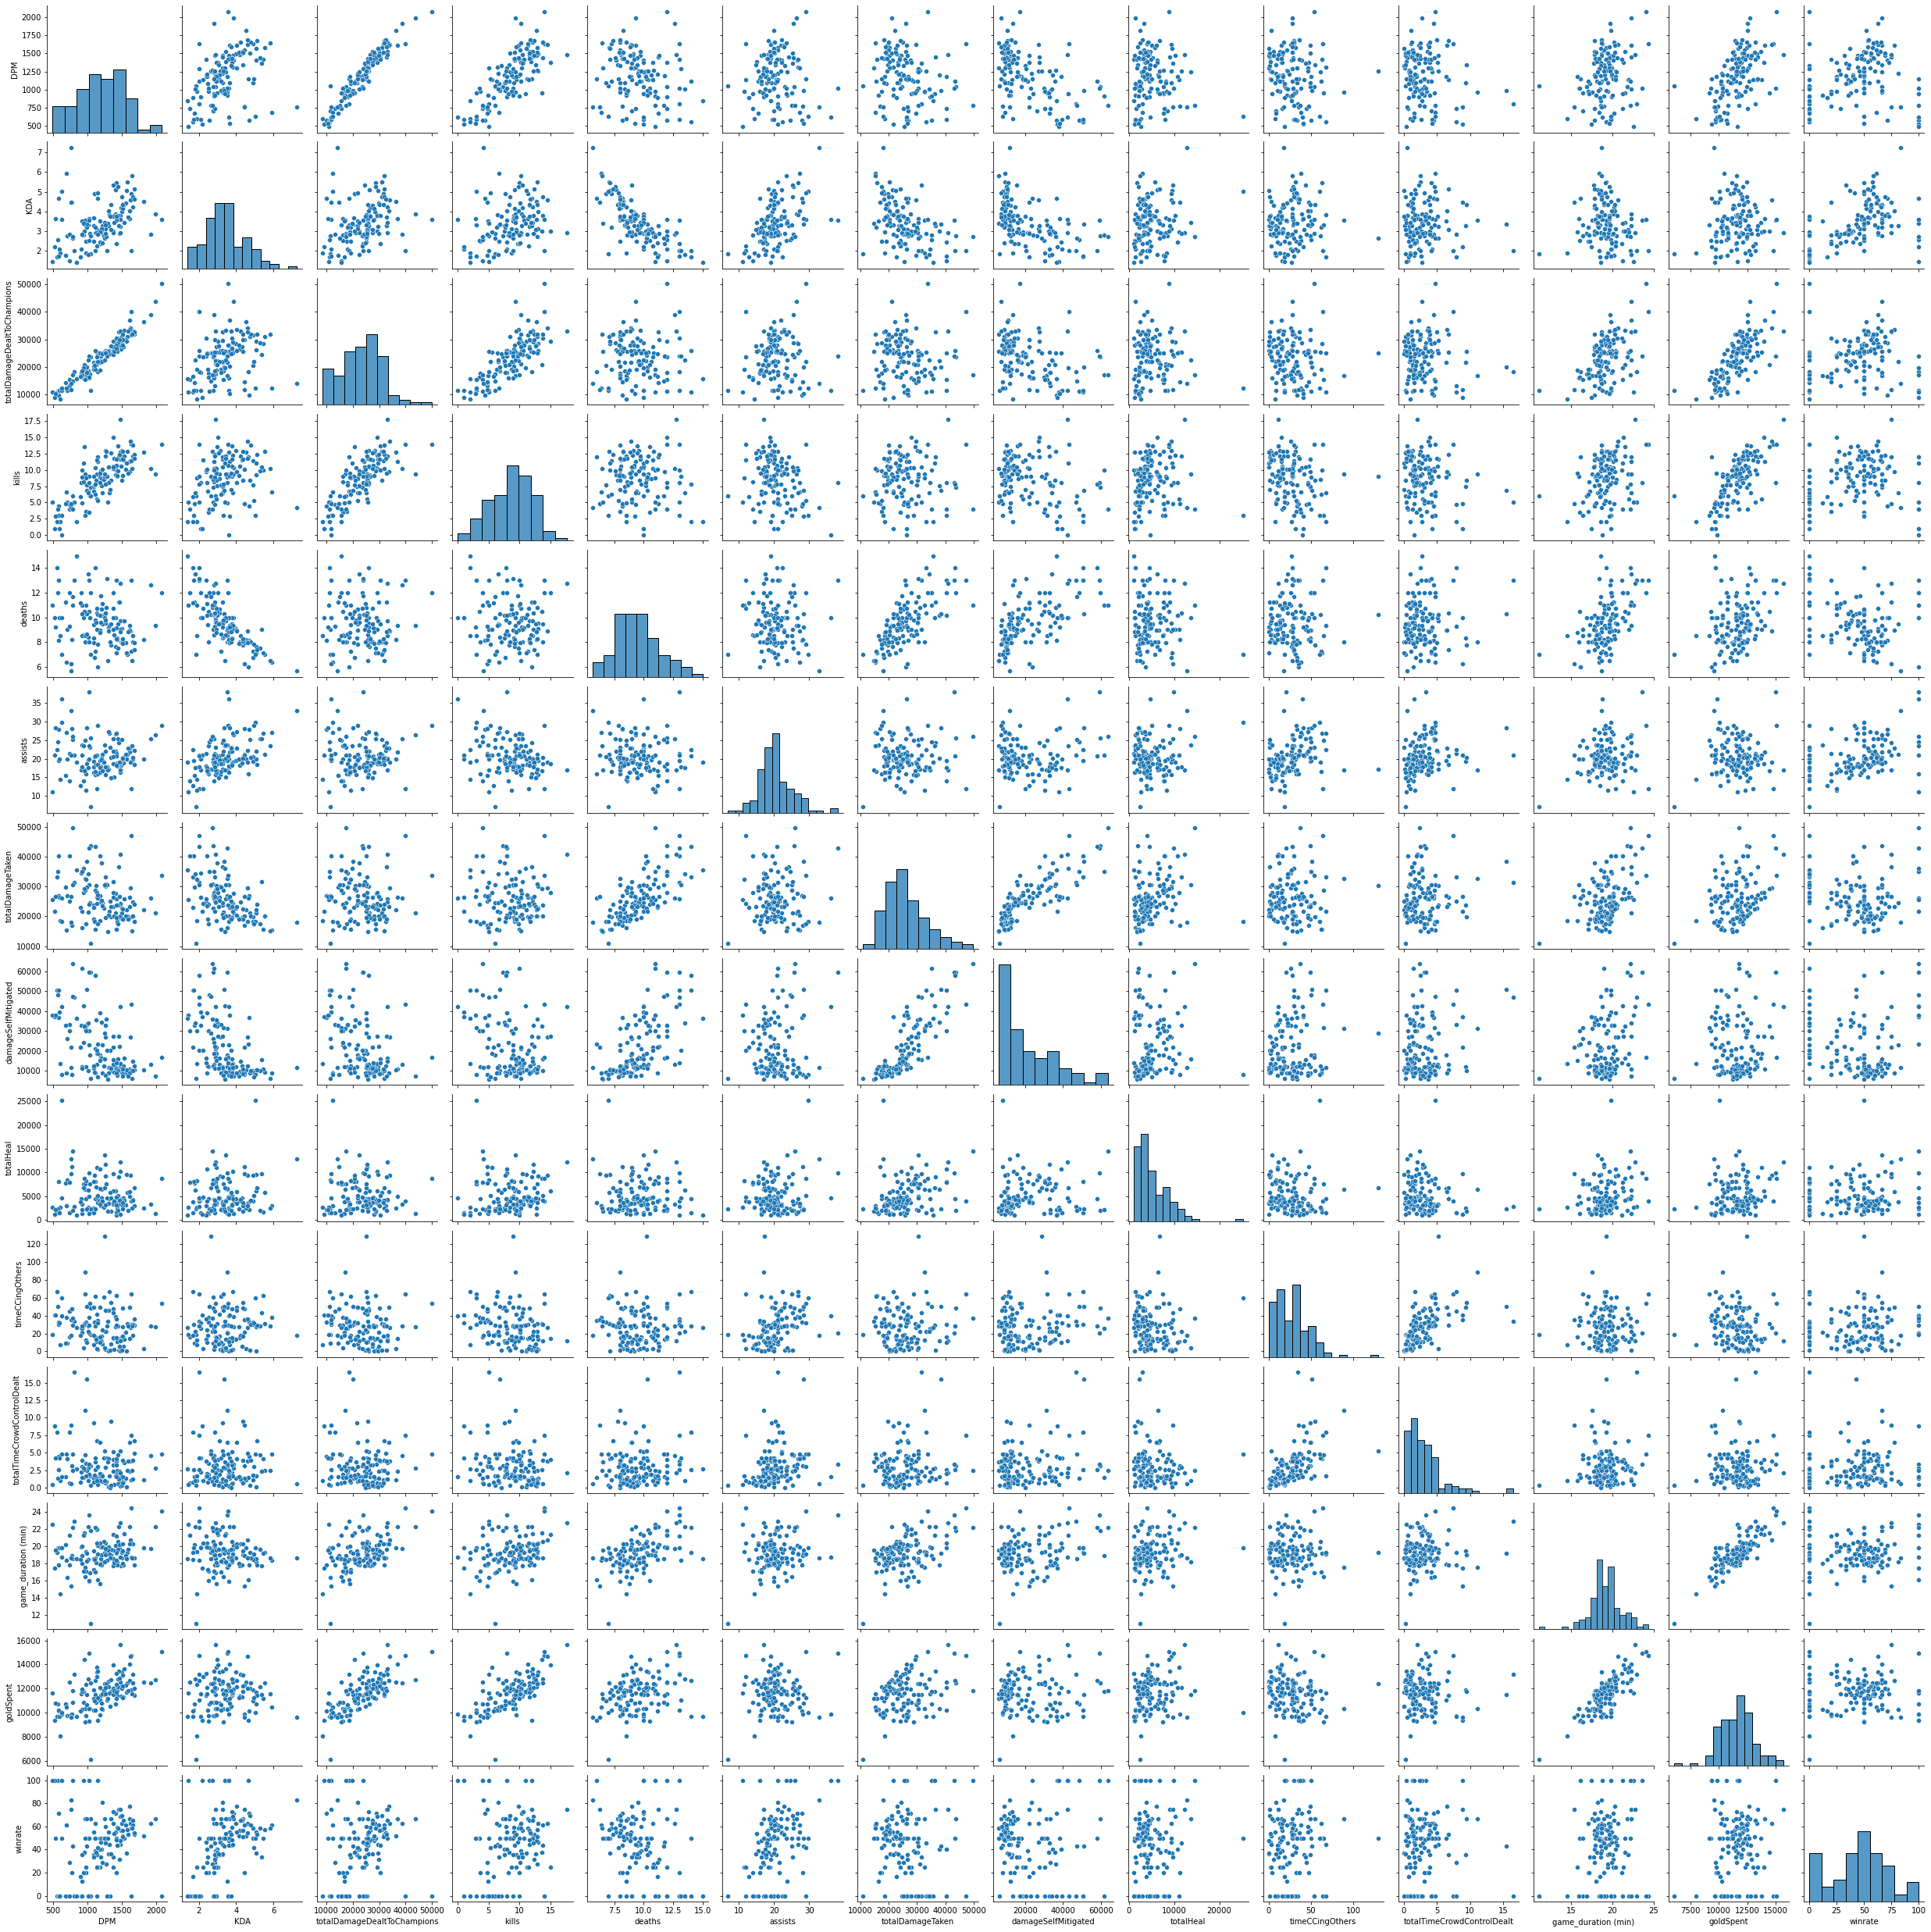

In [106]:
sns.pairplot(avg_stats)
plt.show()

<AxesSubplot:>

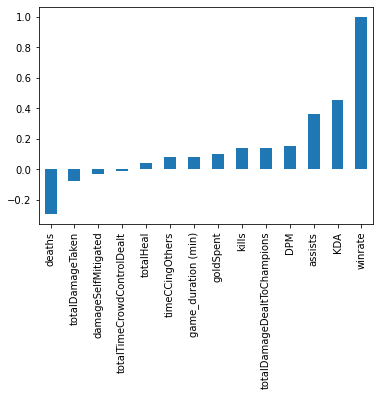

In [107]:
avg_stats.corr()['winrate'].sort_values().plot(kind='bar')

3 variables (DPM, KDA, and Assists) were taken to do a regression individually and collectively to because they showed a slight possitive trend in the pairplot.

## 3 Variables (DPM, KDA, Assists)

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [109]:
target = avg_stats.winrate
features = avg_stats[['DPM', 'KDA', 'assists']]

X_train, X_test, y_train, y_test = train_test_split(features,
                                                   target,
                                                   test_size=0.25,
                                                   random_state=101)

In [110]:
regression = LinearRegression()
regression.fit(X_train, y_train)
rsquared = regression.score(X_train, y_train)

print(f'The r-squared value is {rsquared}')

The r-squared value is 0.2182705263062712


In [111]:
predicted_values = regression.predict(X_test)
residuals = (y_test - predicted_values)

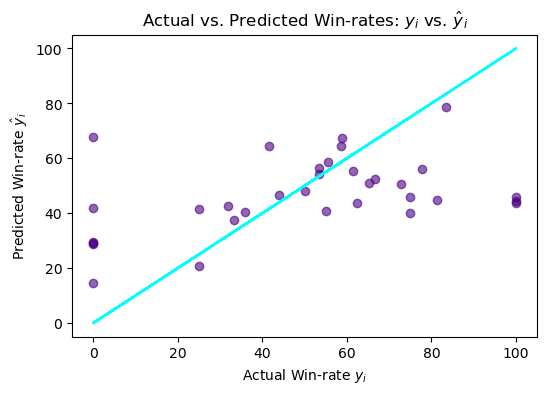

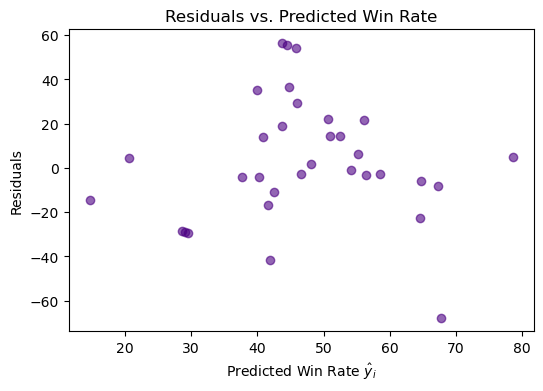

In [112]:
plt.figure(dpi=100)
plt.scatter(x=y_test, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_test, y_test, c='cyan')
plt.title('Actual vs. Predicted Win-rates: $y _i$ vs. $\hat y_i$')
plt.xlabel('Actual Win-rate $y _i$')
plt.ylabel('Predicted Win-rate $\hat y_i$')
plt.show()

plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs. Predicted Win Rate')
plt.xlabel('Predicted Win Rate $\hat y_i$')
plt.ylabel('Residuals')
plt.show()

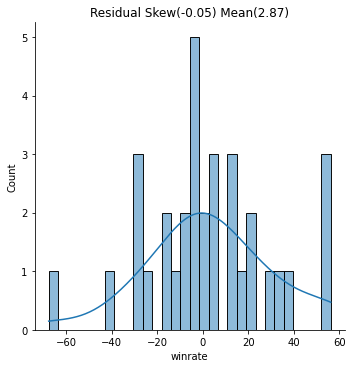

In [113]:
residual_mean = round(residuals.mean(), 2)
residual_skew = round(residuals.skew(), 2)

sns.displot(data=residuals,
           bins=30,
           kde=True)
plt.title(f'Residual Skew({residual_skew}) Mean({residual_mean})')
plt.show()

R-squared was 0.22 which isn't as good however if put into a gaming context, I think it is decent for accounting human behavior in game. The residual skew isn't very high which is good. Overall I think it is a decent model.

In [114]:
print('MAE:', mean_absolute_error(y_test, predicted_values))
print('MSE:', mean_squared_error(y_test, predicted_values))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted_values)))

MAE: 20.704755997585696
MSE: 750.5148206447251
RMSE: 27.395525558833967


## All Variables

I wanted to try doing all the variables from the average stat dataset to see if it was better.

In [115]:
target = avg_stats.winrate
features = avg_stats.drop(['champion', 'role', 'winrate'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                   target,
                                                   test_size=0.25,
                                                   random_state=101)

In [116]:
regression = LinearRegression()
regression.fit(X_train, y_train)
rsquared = regression.score(X_train, y_train)

print(f'The r-squared value is {rsquared}')

The r-squared value is 0.34566788207097066


In [117]:
predicted_values = regression.predict(X_test)
residuals = (y_test - predicted_values)

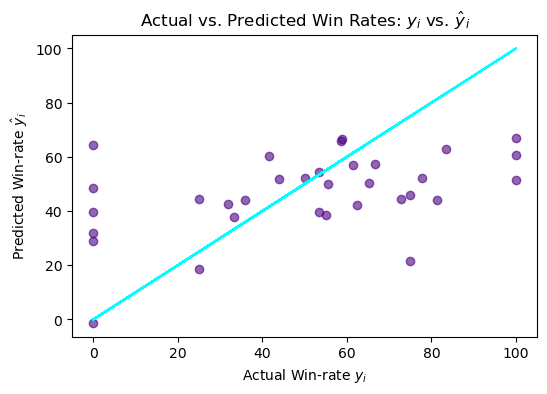

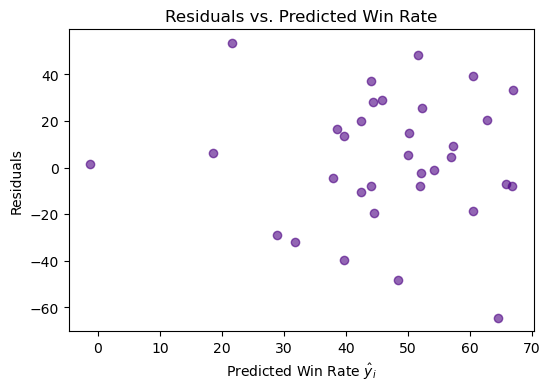

In [118]:
plt.figure(dpi=100)
plt.scatter(x=y_test, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_test, y_test, c='cyan')
plt.title('Actual vs. Predicted Win Rates: $y _i$ vs. $\hat y_i$')
plt.xlabel('Actual Win-rate $y _i$')
plt.ylabel('Predicted Win-rate $\hat y_i$')
plt.show()

plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs. Predicted Win Rate')
plt.xlabel('Predicted Win Rate $\hat y_i$')
plt.ylabel('Residuals')
plt.show()

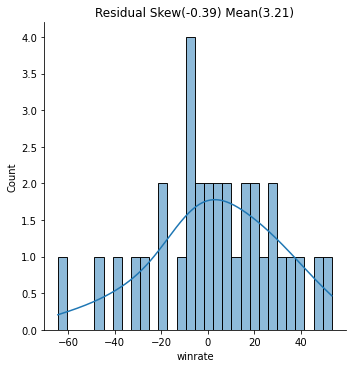

In [119]:
residual_mean = round(residuals.mean(), 2)
residual_skew = round(residuals.skew(), 2)

sns.displot(data=residuals,
           bins=30,
           kde=True)
plt.title(f'Residual Skew({residual_skew}) Mean({residual_mean})')
plt.show()

In [120]:
print('MAE:', mean_absolute_error(y_test, predicted_values))
print('MSE:', mean_squared_error(y_test, predicted_values))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted_values)))

MAE: 21.468486918151374
MSE: 735.4855970010822
RMSE: 27.11983770233668


The R-squared value has a positive increase from 0.21 to 0.35. The residual skew became larger however at -0.39 compared to -0.05.

When evaluating the model with the mean absolute error and mean squared error, the model turned out to be average at best with an error of 20%. The root mean square errors show residuals that are within a 27% win rate range of the regression. If you compare these to the error in the model with 3 variables, they are very similar to each other.

I can assume then that either model works for predicting my champion win rates.

I wanted to see if I can do a transformation to see if it could be even better. Any form of Log transformation were out of the question because some champions have a 0% win rate. So I tried to check if a square root could work.

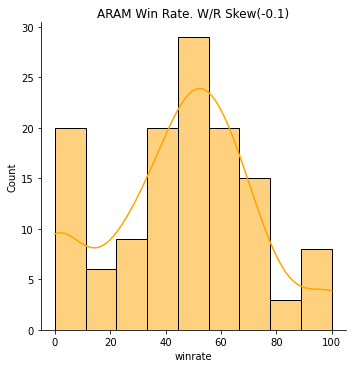

In [121]:
winrate_skew = round(avg_stats.winrate.skew(), 2)
sns.displot(data=avg_stats.winrate,
           kde=True,
           color='orange')
plt.title(f'ARAM Win Rate. W/R Skew({winrate_skew})')
plt.show()

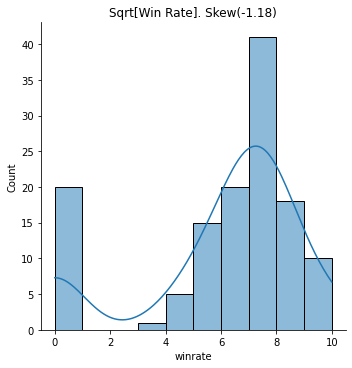

In [122]:
sqrt_winrate = np.sqrt(avg_stats.winrate)
sqrt_skew = round(sqrt_winrate.skew(), 2)
sns.displot(data=sqrt_winrate, kde=True)
plt.title(f'Sqrt[Win Rate]. Skew({sqrt_skew})')
plt.show()

And it was determined that the square root transformation would not create a better regression because the skew got increased.

## Model Test

In [123]:
regression_coef = pd.DataFrame(data=regression.coef_, index=X_train.columns, columns=['Coefficient'])
regression_coef

Coefficient
DPM                                 0.08
KDA                                -3.86
totalDamageDealtToChampions        -0.00
kills                               1.47
deaths                             -6.91
assists                             2.12
totalDamageTaken                   -0.00
damageSelfMitigated                 0.00
totalHeal                          -0.00
timeCCingOthers                     0.16
totalTimeCrowdControlDealt         -1.30
game_duration (min)                 8.34
goldSpent                           0.00

Kills, Deaths, and Game Duration are significant factors in estimating the win rate according to the coefficients. Game Duration and Kills have a positive impact while deaths have a negative impact on win rate.

### Using the Average of Dataset

In [124]:
# Starting Point: Average Values in the Dataset
features = avg_stats.drop(['champion', 'role', 'winrate'], axis=1)
average_vals = features.mean().values
winrate_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
winrate_stats

DPM  KDA  totalDamageDealtToChampions  kills  deaths  assists  \
0 1,191.97 3.41                    23,431.73   8.65    9.54    20.54   

   totalDamageTaken  damageSelfMitigated  totalHeal  timeCCingOthers  \
0         25,928.02            21,665.41   5,127.38            27.70   

   totalTimeCrowdControlDealt  game_duration (min)  goldSpent  
0                        3.09                19.23  11,606.33

In [125]:
winrate_estimate = regression.predict(winrate_stats)[0]
print(f'The win rate estimate: {winrate_estimate:.3}%')

The win rate estimate: 44.3%


### Using Sample Numbers

In [126]:
# Test values
t_kills = 10 
t_deaths = 6 
t_assists = 16 
t_KDA = (t_kills + t_assists) / t_deaths

t_dmg_taken = 13000
t_mit = 5000 
t_heal = 2000 
t_cc_total = 3
t_cc_time = 1.2
t_gold = 14000

t_dmg = 50100 
t_time = 18
t_DPM = (t_dmg / t_time)

In [127]:
winrate_stats.kills = t_kills
winrate_stats.deaths = t_deaths
winrate_stats.assists = t_assists
winrate_stats.KDA = t_KDA
winrate_stats.totalDamageTaken = t_dmg_taken
winrate_stats.damageSelfMitigated = t_mit
winrate_stats.totalHeal = t_heal
winrate_stats.timeCCingOthers = t_cc_total
winrate_stats.totalTimeCrowdControlDealt = t_cc_time
winrate_stats.goldSpent = t_gold
winrate_stats.totalDamageDealtToChampions = t_dmg
winrate_stats['game_duration (min)'] = t_time
winrate_stats.DPM = t_DPM

winrate_estimate = regression.predict(winrate_stats)[0]
print(f'The win rate estimate: {winrate_estimate:.3}%')

The win rate estimate: 78.9%


# Logistic Regression

Similarly I wanted to see if I can predict if the win/loss outcome of a match using a logistic regression.

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
data = data.drop(['game_id', 'champion'], axis=1)

In [130]:
role = pd.get_dummies(data.role, drop_first=True)

In [131]:
data = pd.concat([data, role], axis=1)

In [132]:
data = data.drop('role', axis=1)

In [133]:
win_int = []
for match in data.win:
    if match:
        win_int.append(1)
    else:
        win_int.append(0)
data.win = win_int

In [134]:
X = data.drop('win', axis=1)
y = data['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [135]:
logmodel = LogisticRegression(max_iter=5000, solver='saga')

In [136]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='saga')

In [137]:
predictions = logmodel.predict(X_test)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix

In [139]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       253
           1       0.77      0.75      0.76       267

    accuracy                           0.76       520
   macro avg       0.76      0.76      0.76       520
weighted avg       0.76      0.76      0.76       520

[[195  58]
 [ 68 199]]


The model had a 76% overall accuracy in predicting win/loss outcomes. 

I think that is great because the model 3 out of 4 times is able to predict a correct outcome in something that can vary frequently. For example, games that are won when they should have been lost and vice versa. Those types of games are hard because even if the stats point towards a particular outcome, the match itself can swing on one mistake from a player or one major fight.

# Conclusion

Throughout the data exploration, there is a constant trend that is centered around Marksmen and Mages. I tend to get more kills on them, more assists on them, do more damage on them, and just overall play better on them. I have a positive win rate on both marksman and mages compared to the other roles. However, even when playing a comfortable role, I can still get caught out and die a lot with them (refer: games with most death table). 

Including Marksmen and Mages, I actually play a large variety of champions, more than I expected. And I can play them moderately well on average too. I am able to provide decent heals on Supports and can take damage when needed on Tanks.
Although they are not exactly my strong points. 

In an attempt to create a model to estimate my win rate on any given champion, the best model has a R-squared value of 0.39. This means that the model was able to explain around 39% of the observations. Although it may look weak, I think it is a relatively decent value because there is variance in how proficient I can play a champion. The basic skills of playing a champion may be there i.e. positioning in fights but each champion comes with their own ability kit and style to master. My champion win rate isn't only showing wins solely by me, the other players are also hidden within this stat because League of Legends is a team game. 

No game is won simply on the backs of one member. They can have a significant impact on winning, but they are not and can not be the sole reason for winning, esp. in ARAM where 10 members are shoved into a one-lane map. Furthermore, each player is a person and they can have good and bad days. It is hard to be able to win consistently. Some one's bad day can make a game harder and the odds are against us. There is also each person's champion playability, whether they can play their chosen champion or not. ARAM is random after all. 

A model was then created to predict a match outcome based on my stats using a Logistic Regression. The regression had a 75% accuracy rate overall. The model found it a little hard to avoid type I and type II errors basing off on solely my match statistics. As mentioned before, it may be because of losing or winning crucial moments in the game, or someone making a mistake and the other capitalizing. It can also be because there was a stand-out performer on either team that diminished my own stats. Conclusively, I think the model is a decent model.

All in all, if I want to win, I should focus on playing Marksmen and Mages. For my favorite champion picks, I am more likely to win with them except LeBlanc and Nidalee who has less than 50% win rate. But I know I will pick them regardless because of how fun they are to play as. I should also try to practice Fighters and Tanks, all melee classes, more because they aren't being played as well as I would like. I am once again able to reaffirm that League of Legends is in fact a team game.